In [61]:
import sys
sys.path.append('..')  # Add parent folder to system path

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from Others import LoadData
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from Constants import *
from kmodes.kmodes import KModes


from evaluate_clustering import evaluate_clusters, profiling_clustering_cats


In [62]:
cases = LoadData.load_cases("../../Data/cases.csv")

In [64]:
clustering = KModes(init='Huang', n_init=5, verbose=1)

In [65]:
# Extract numerical features for clustering
columns=['Antiquity', 'Pages', 'Bestseller', 'Film', 'Saga'] + GENRES
def get_variables(case):
    variables, genres = case.get_variables()
    return variables + genres
data = [get_variables(case) for case in cases]
# data = pd.DataFrame(data, columns=columns)
data = pd.DataFrame(data, columns=columns)

In [ ]:
# clustering = AgglomerativeClustering(affinity='jaccard', linkage='complete')


# evaluate_clusters(data, clustering, k_range=range(5, 10))

In [67]:
# Z = linkage(data, method='complete', metric='jaccard')

# # Plot the dendrogram
# patata = dendrogram(Z)
# plt.xlabel('Samples')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()


In [72]:
clustering.n_clusters = 20
clusters = clustering.fit_predict(data)

# Add cluster information to Case objects
for i, case in enumerate(cases):
    case.cluster = clusters[i]

# Visualize the clustering
cluster_data = data.copy()
cluster_data["cluster"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 391, cost: 3023.0
Run 1, iteration: 2/100, moves: 188, cost: 2939.0
Run 1, iteration: 3/100, moves: 8, cost: 2939.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 267, cost: 3196.0
Run 2, iteration: 2/100, moves: 75, cost: 3196.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 465, cost: 3031.0
Run 3, iteration: 2/100, moves: 57, cost: 3019.0
Run 3, iteration: 3/100, moves: 1, cost: 3019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 297, cost: 3029.0
Run 4, iteration: 2/100, moves: 43, cost: 3029.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 381, cost: 3101.0
Run 5, iteration: 2/100, moves: 24, cost: 3101.0
Best run

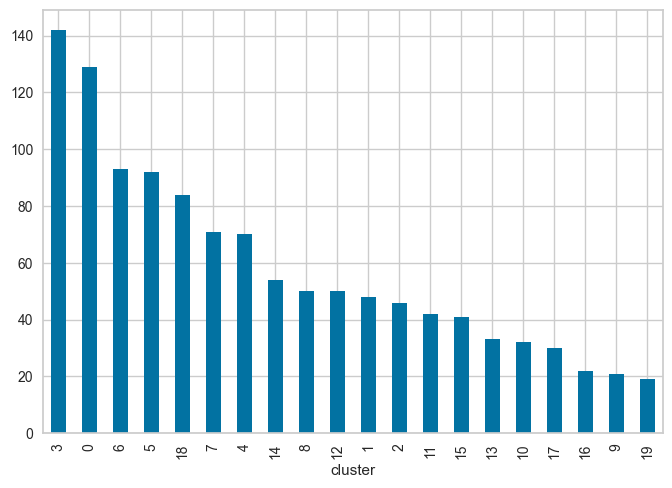

In [73]:
_ = cluster_data['cluster'].value_counts().plot(kind='bar')

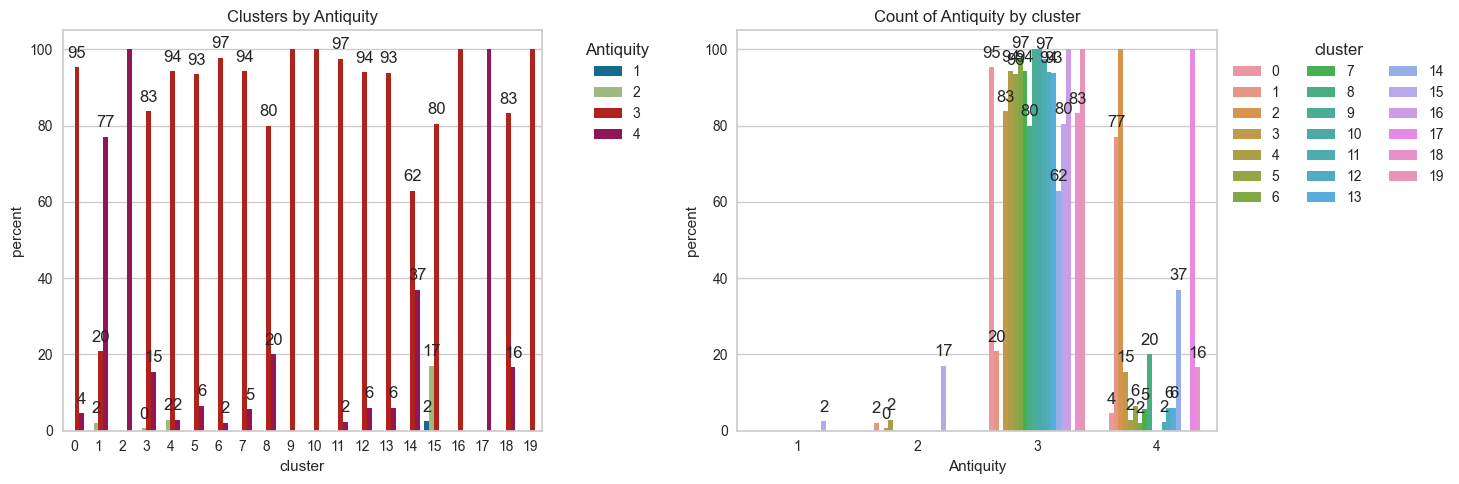

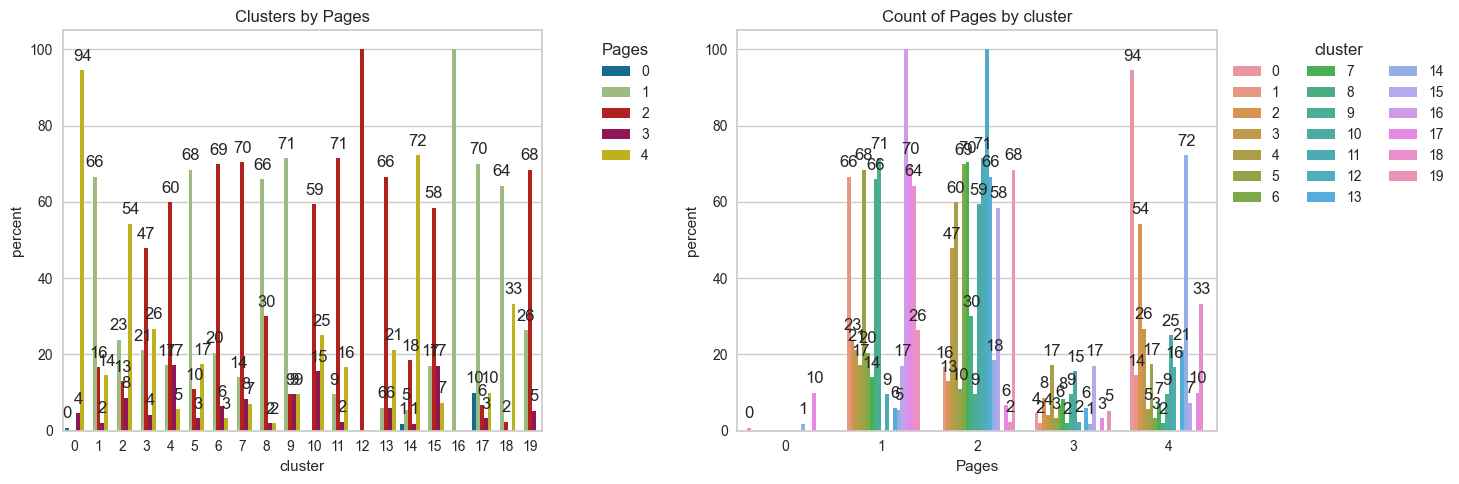

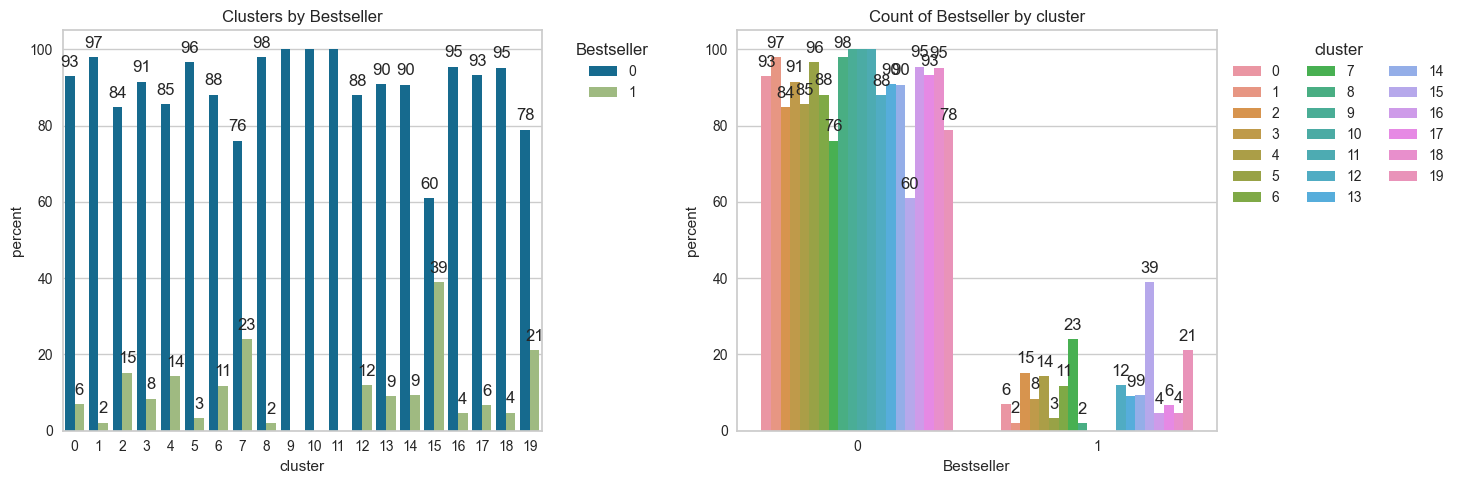

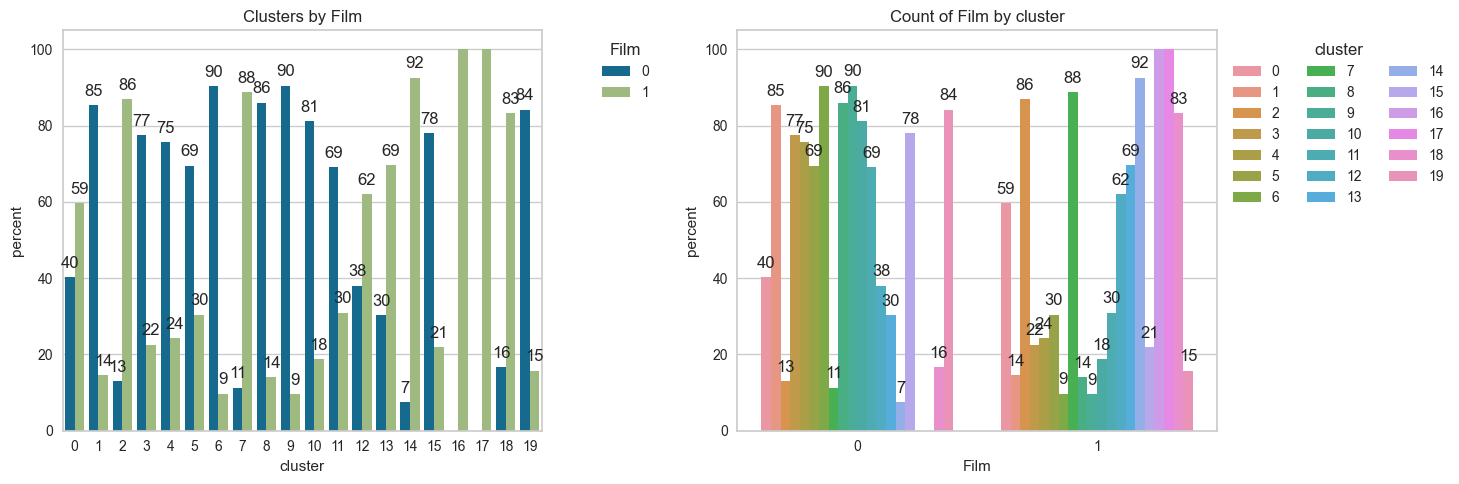

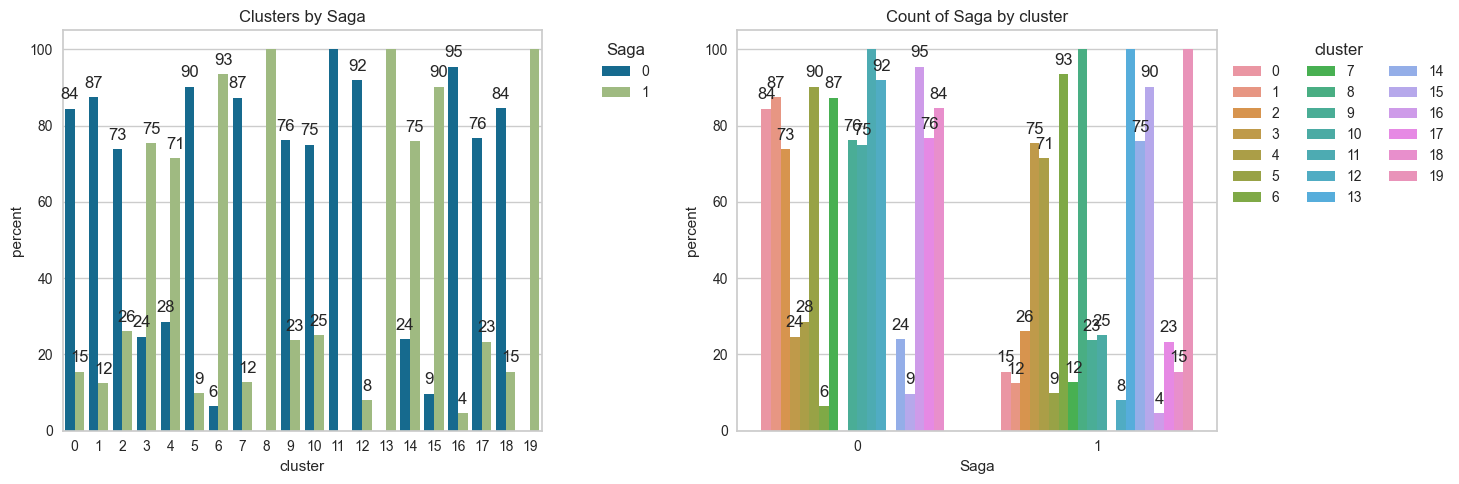

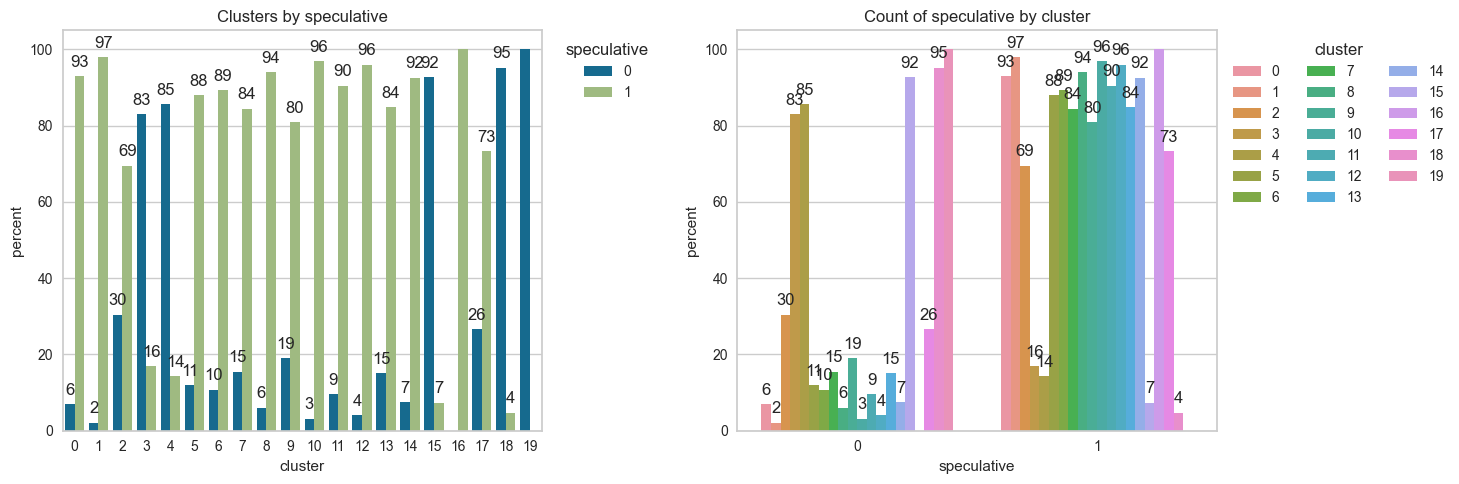

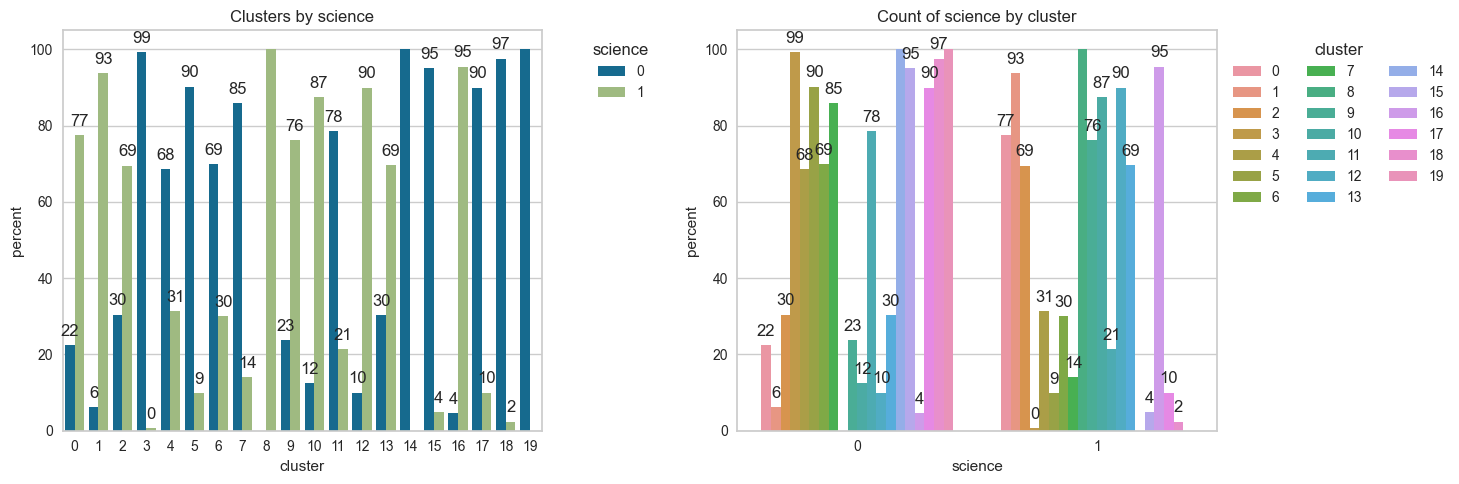

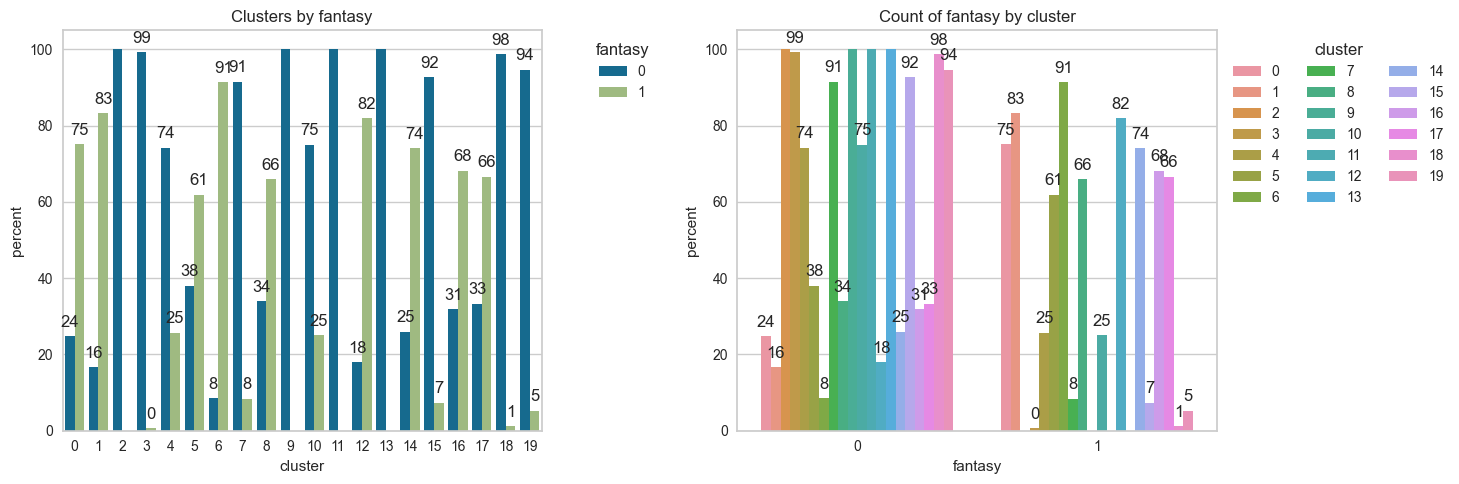

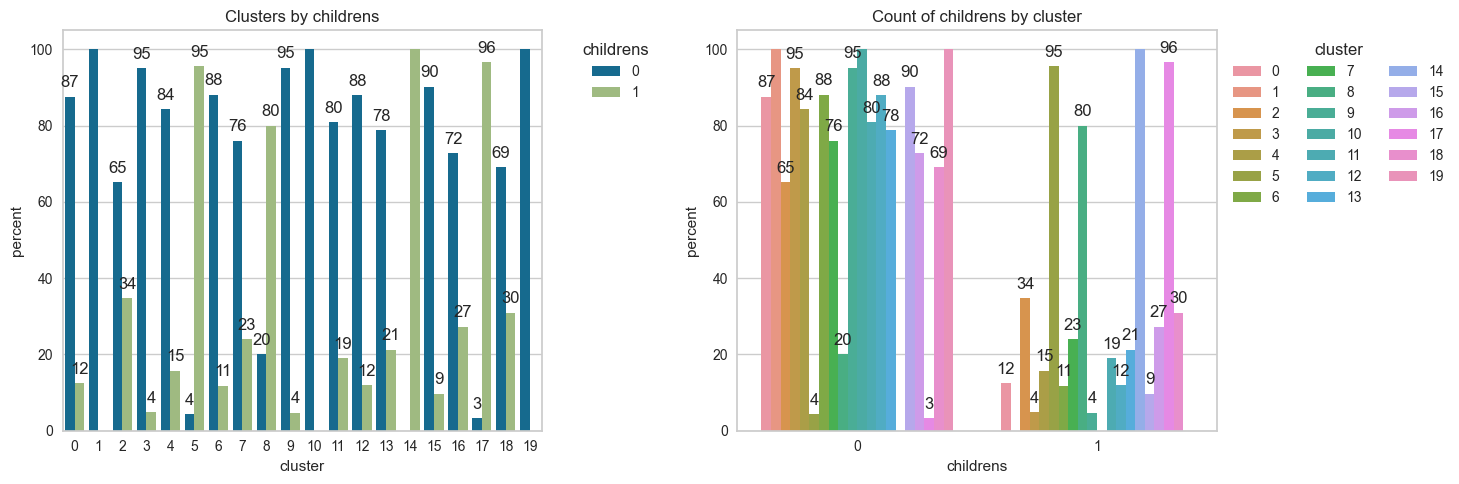

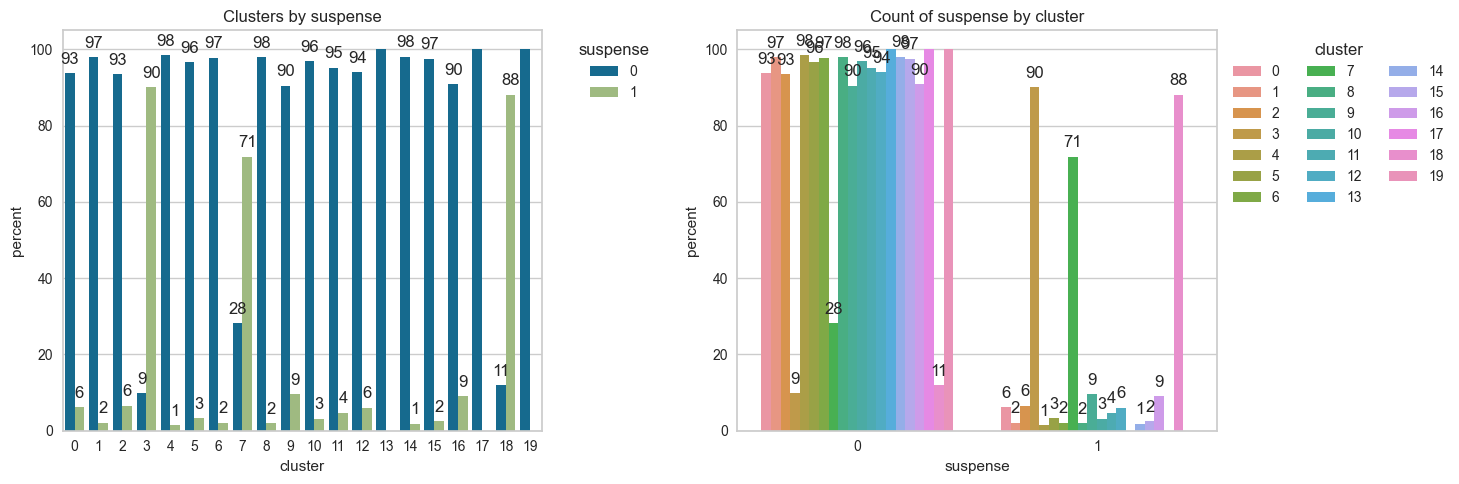

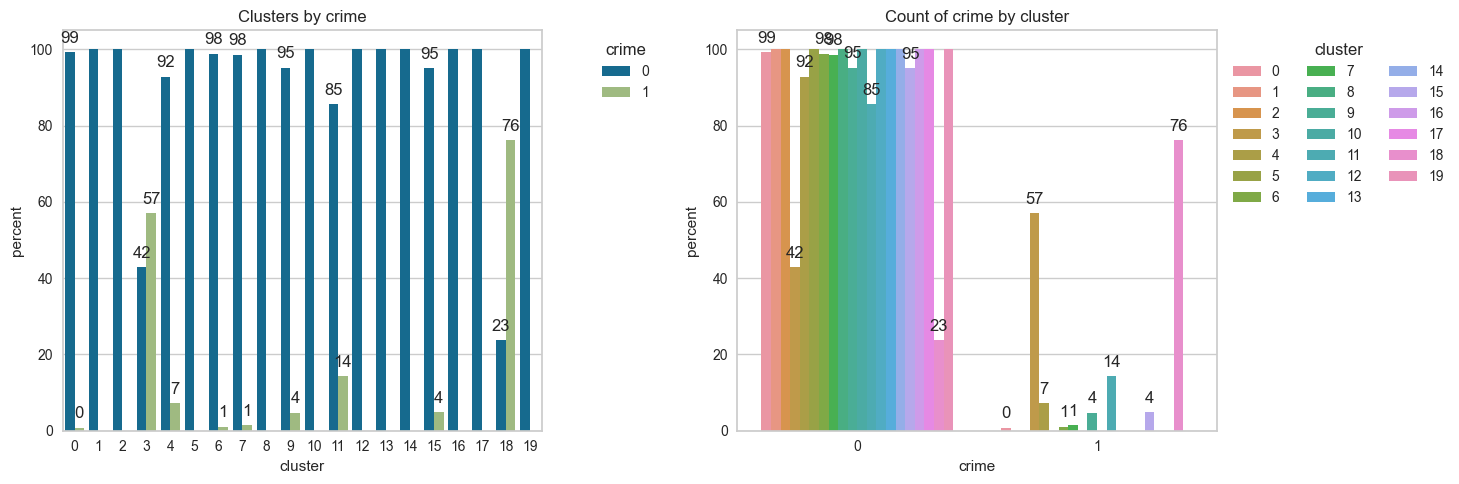

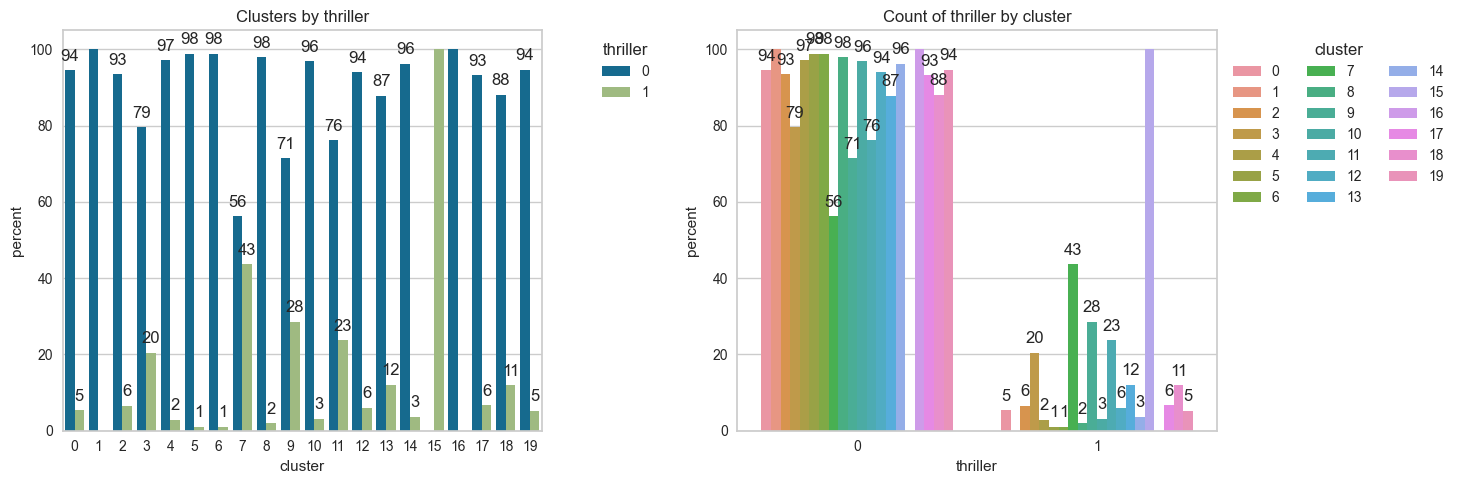

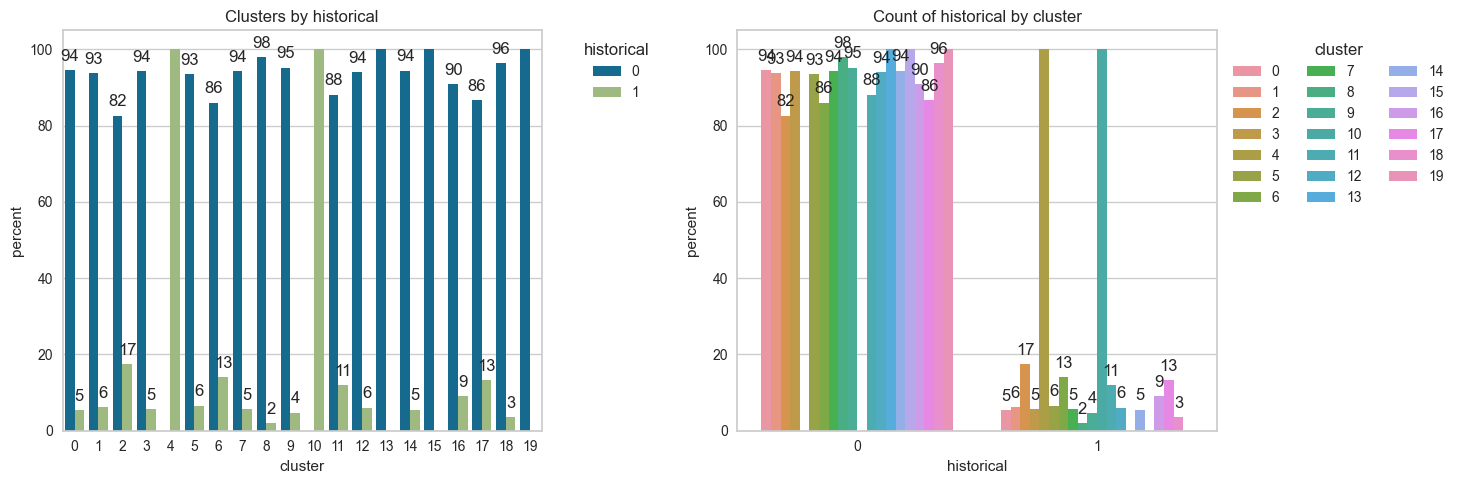

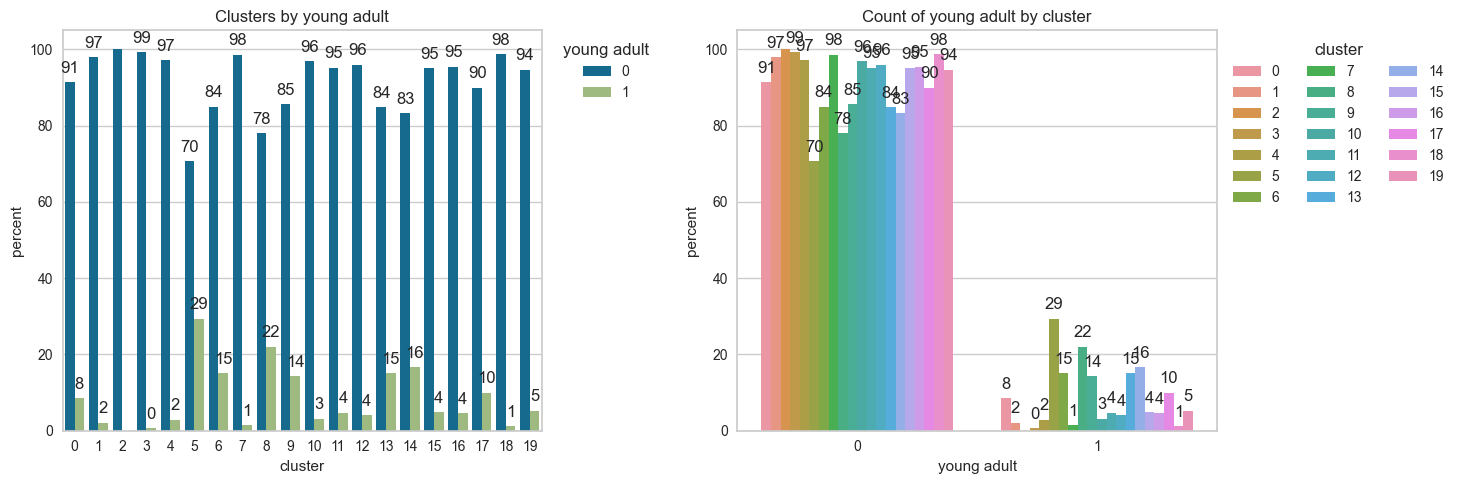

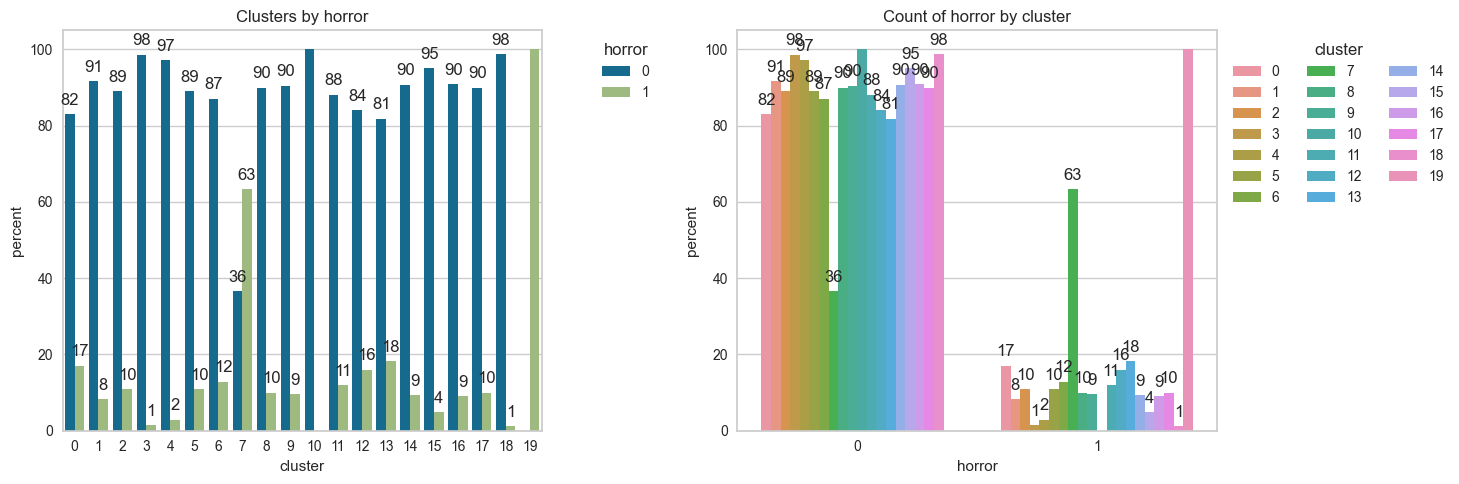

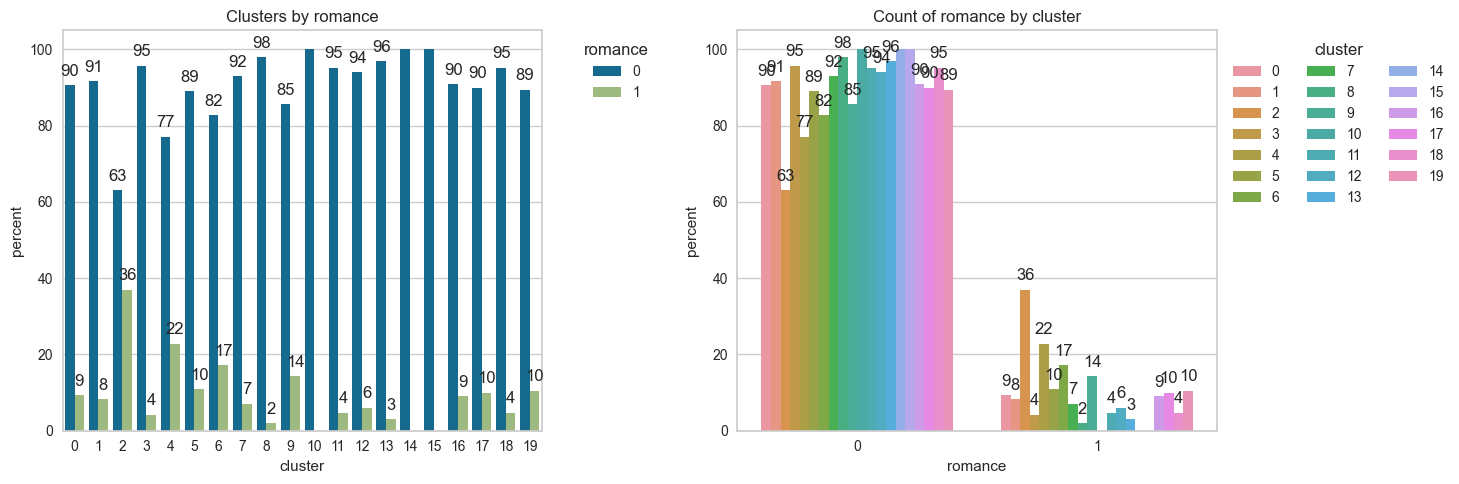

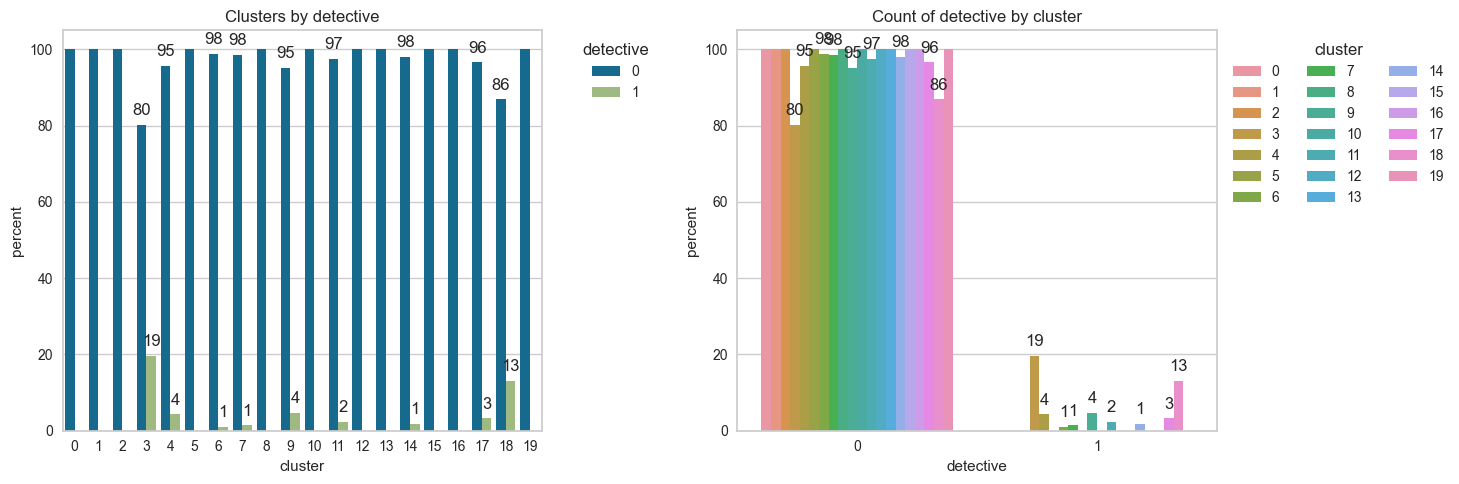

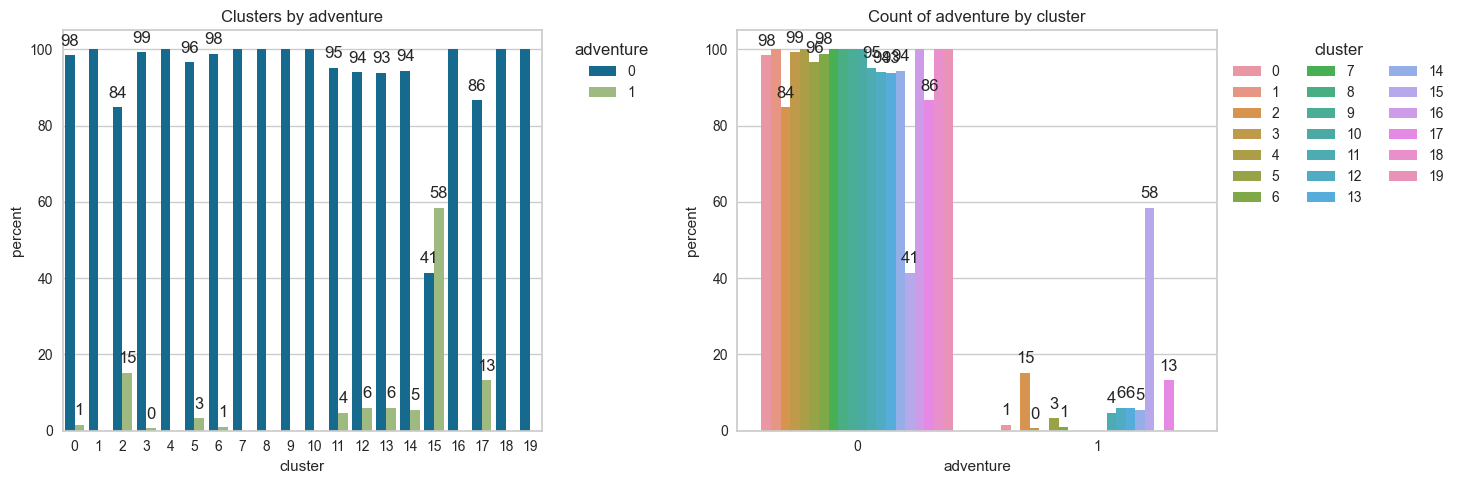

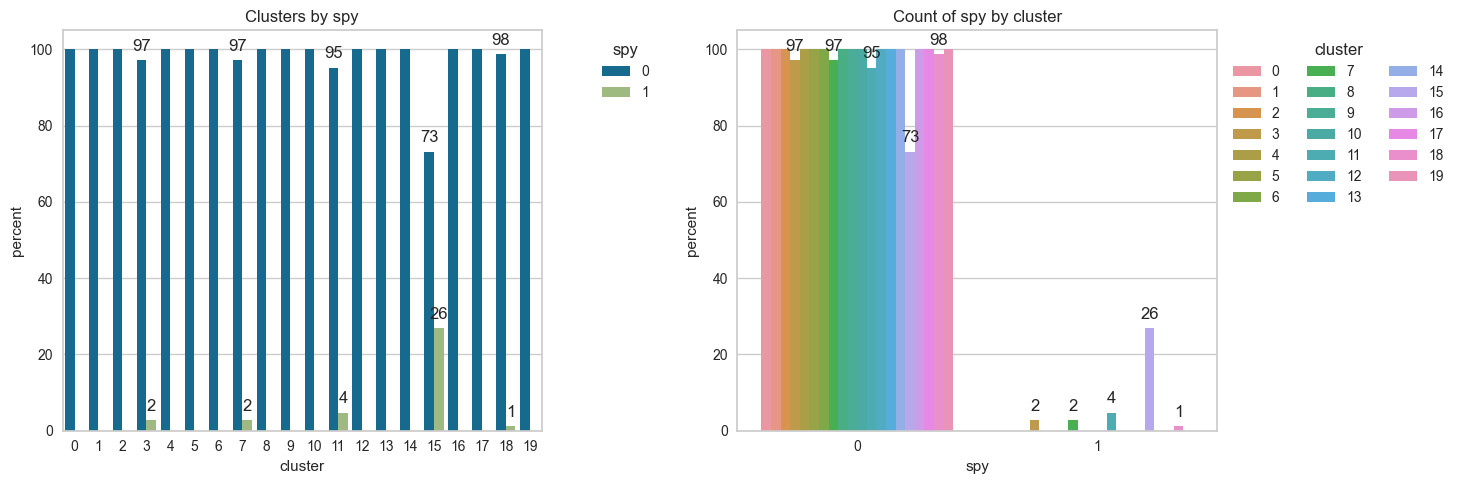

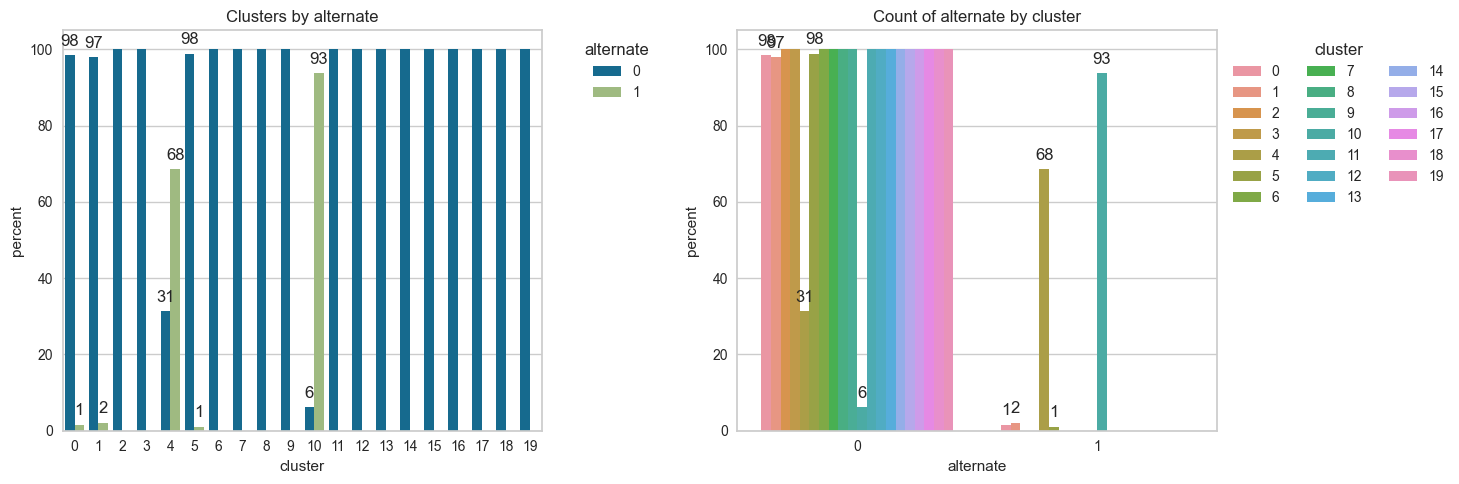

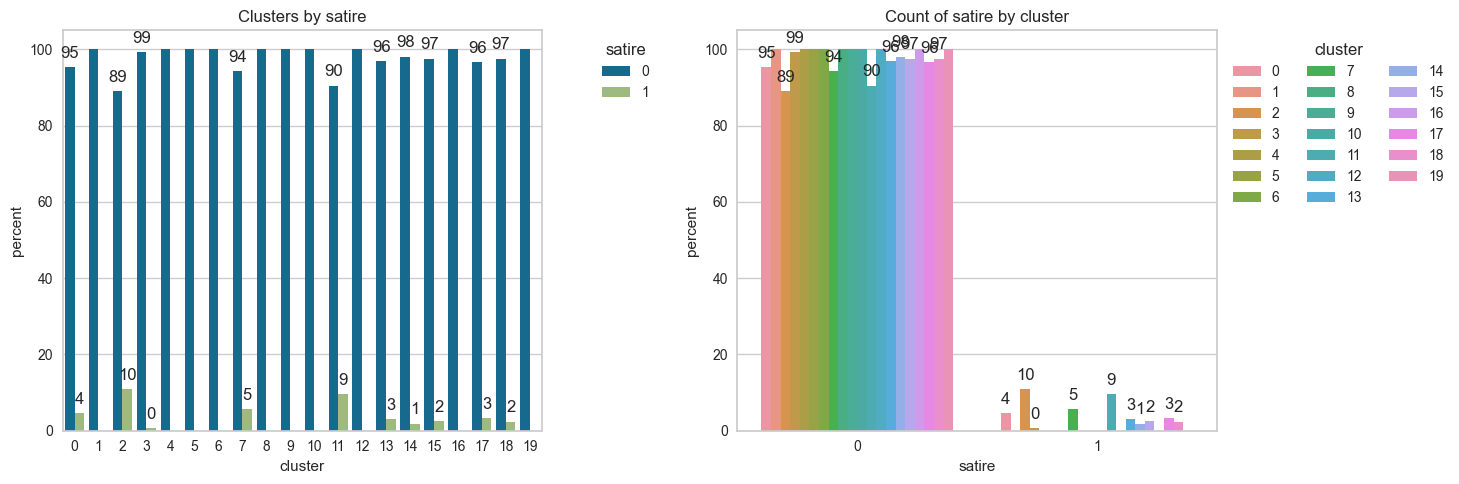

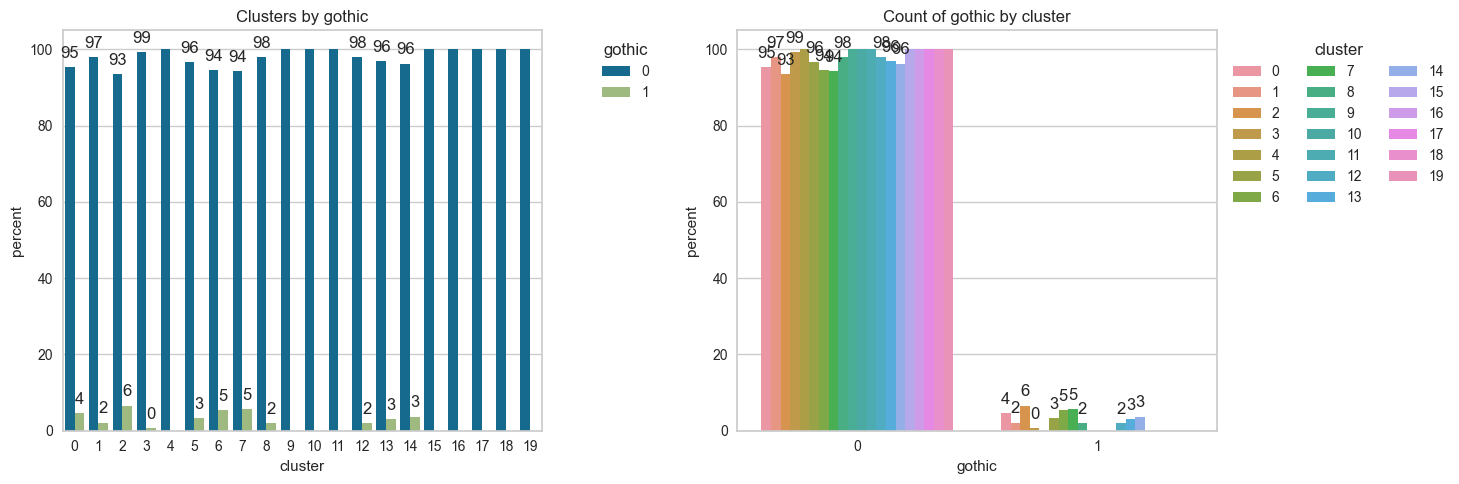

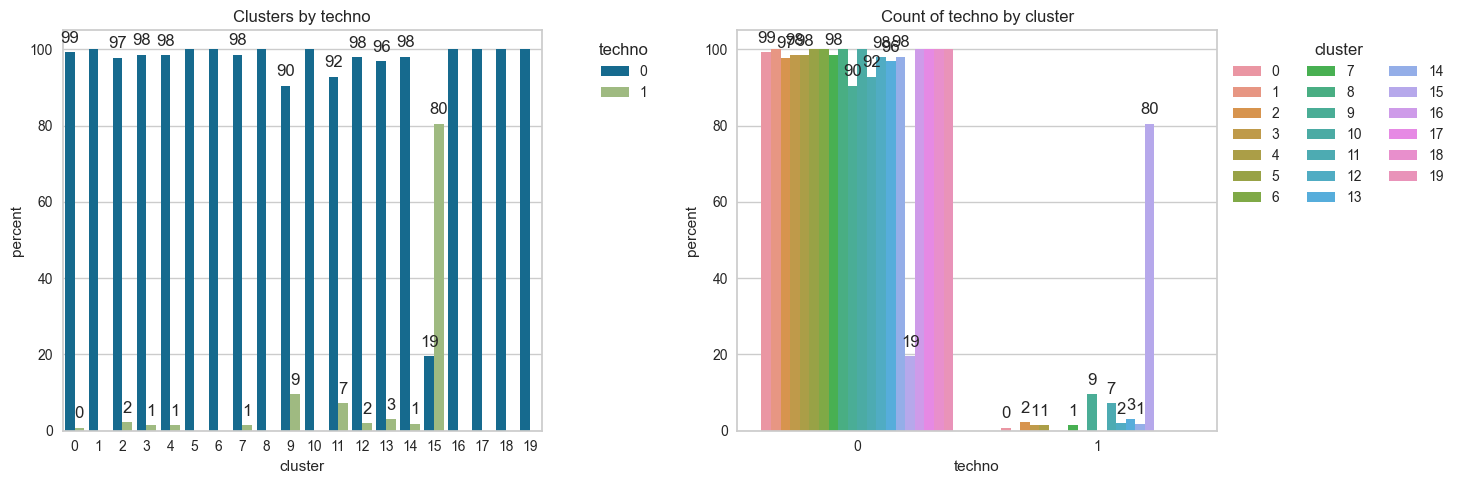

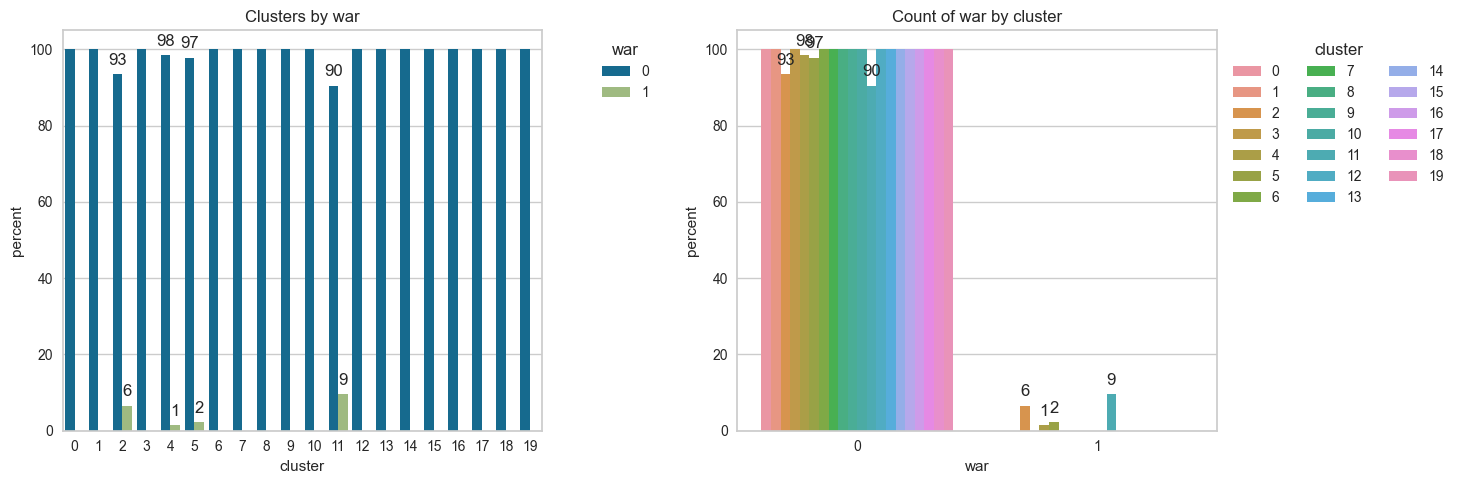

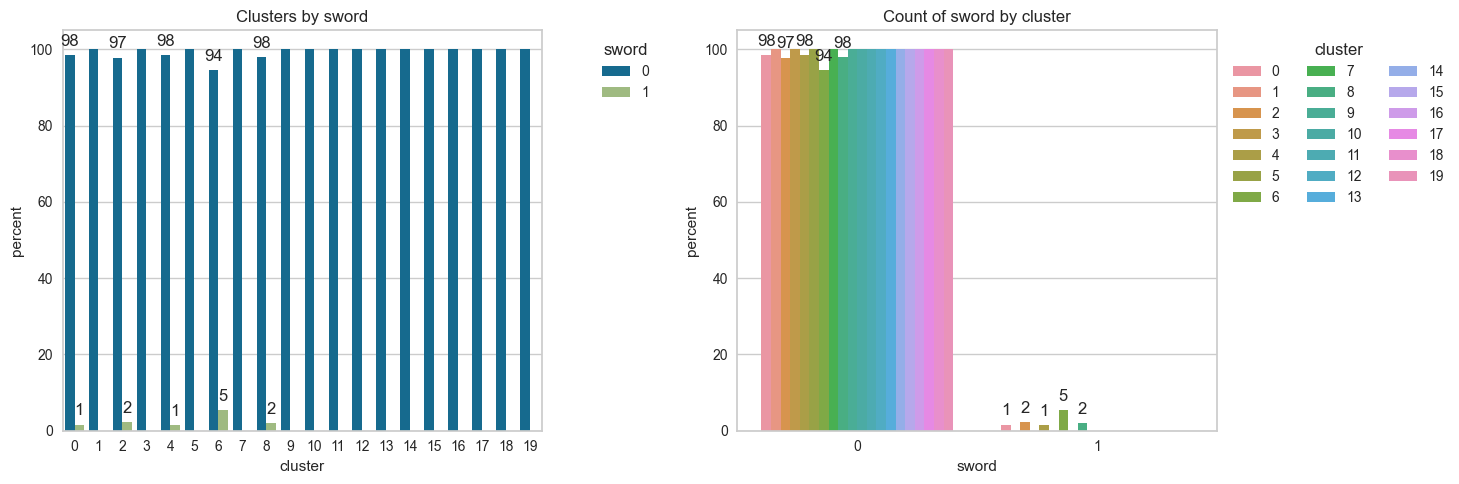

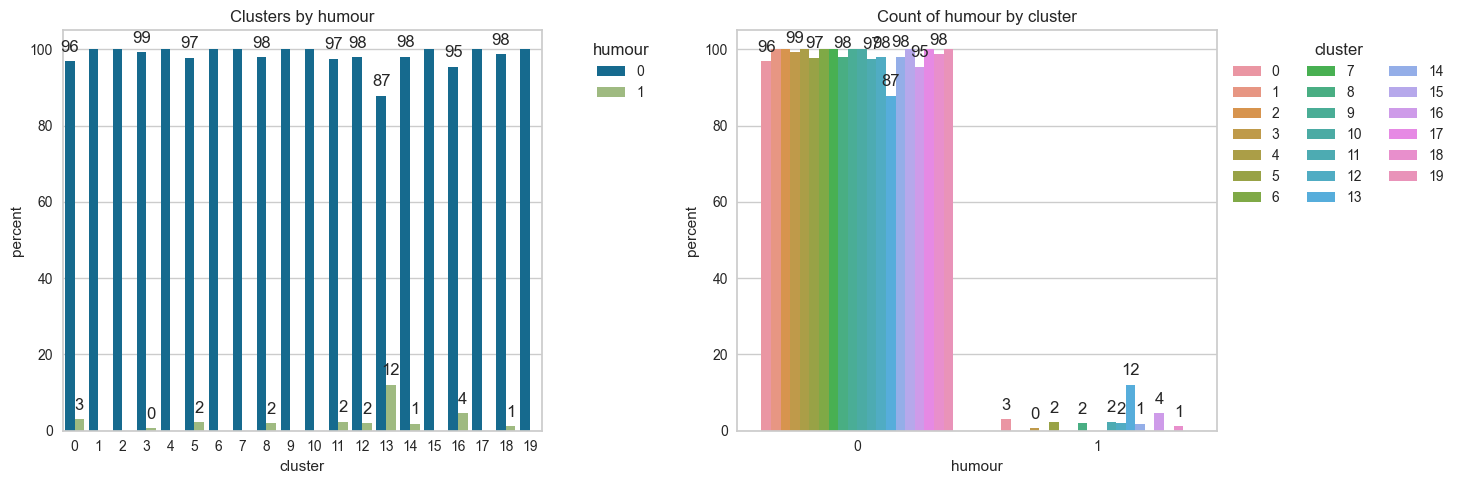

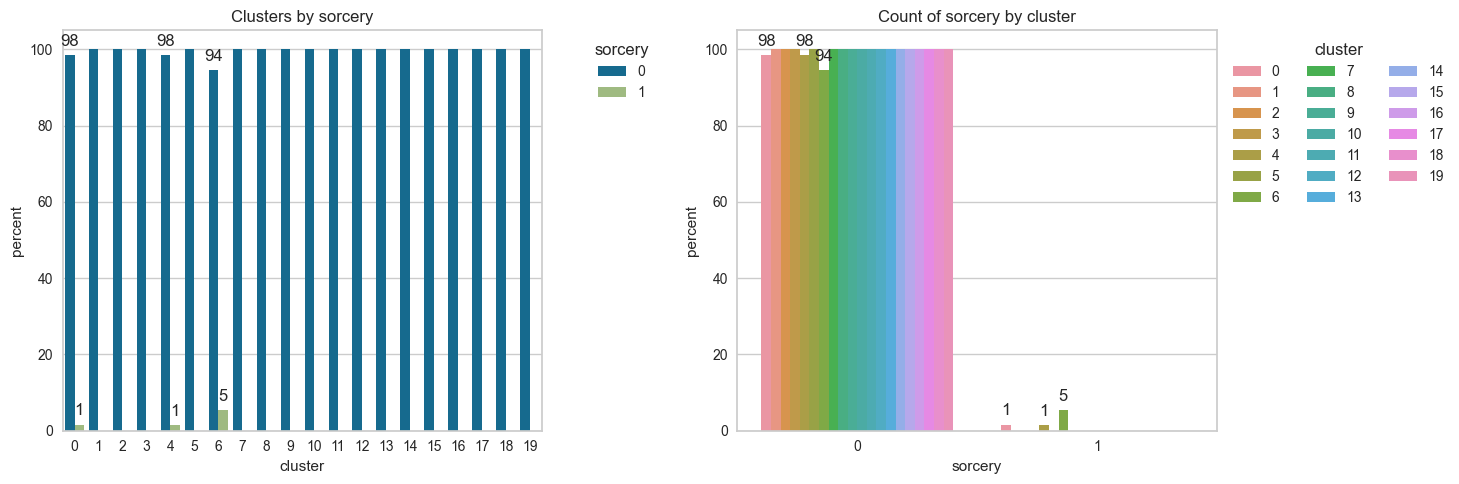

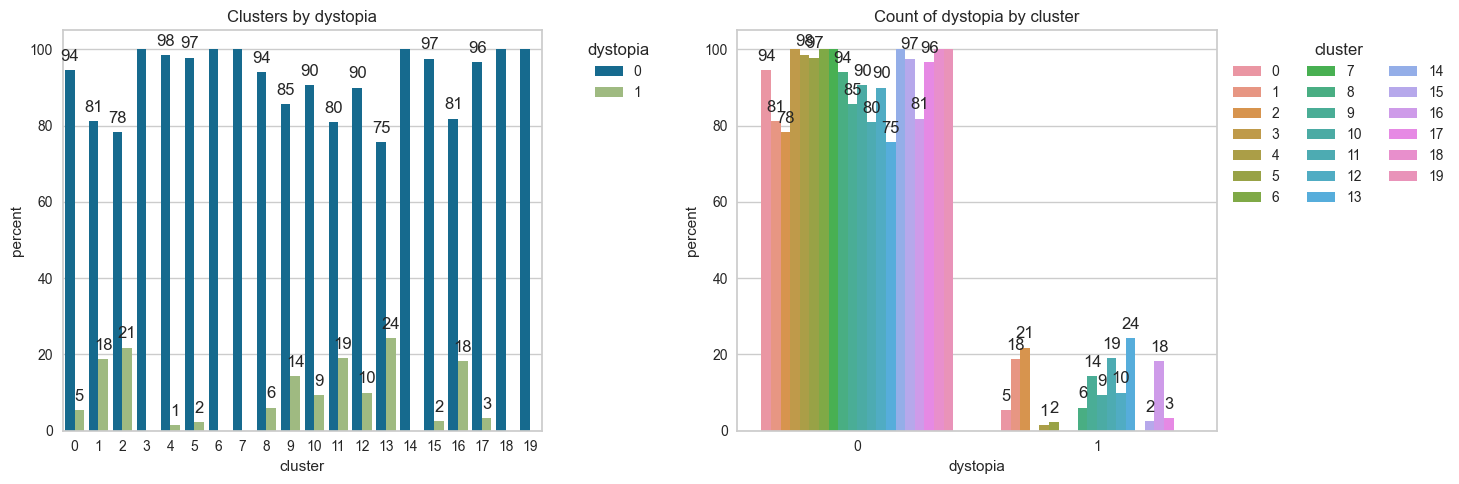

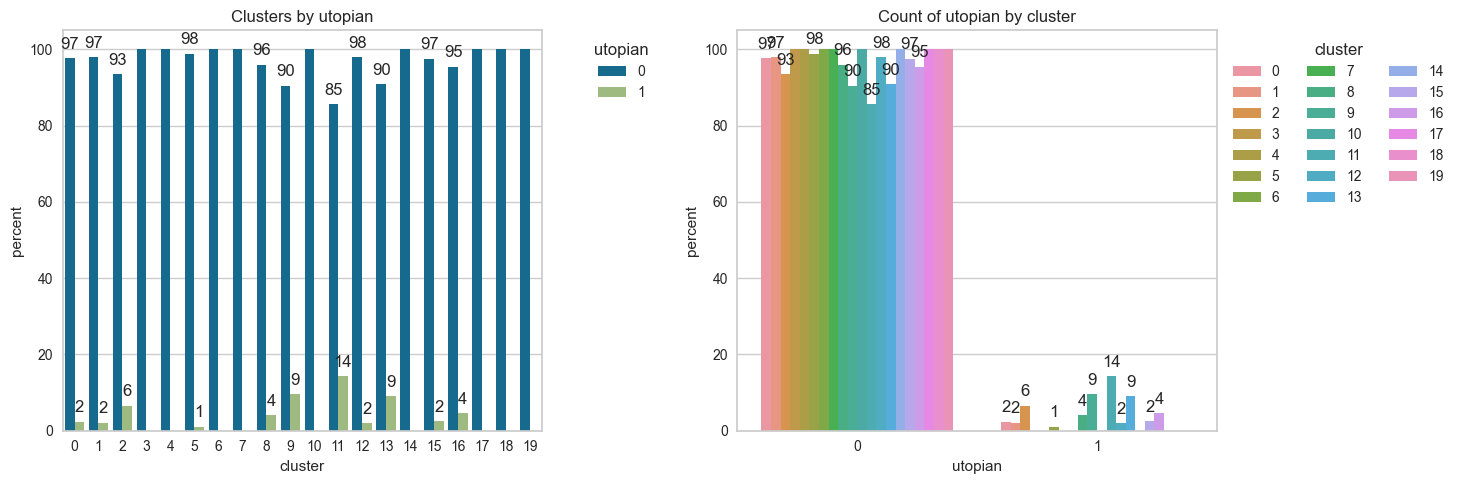

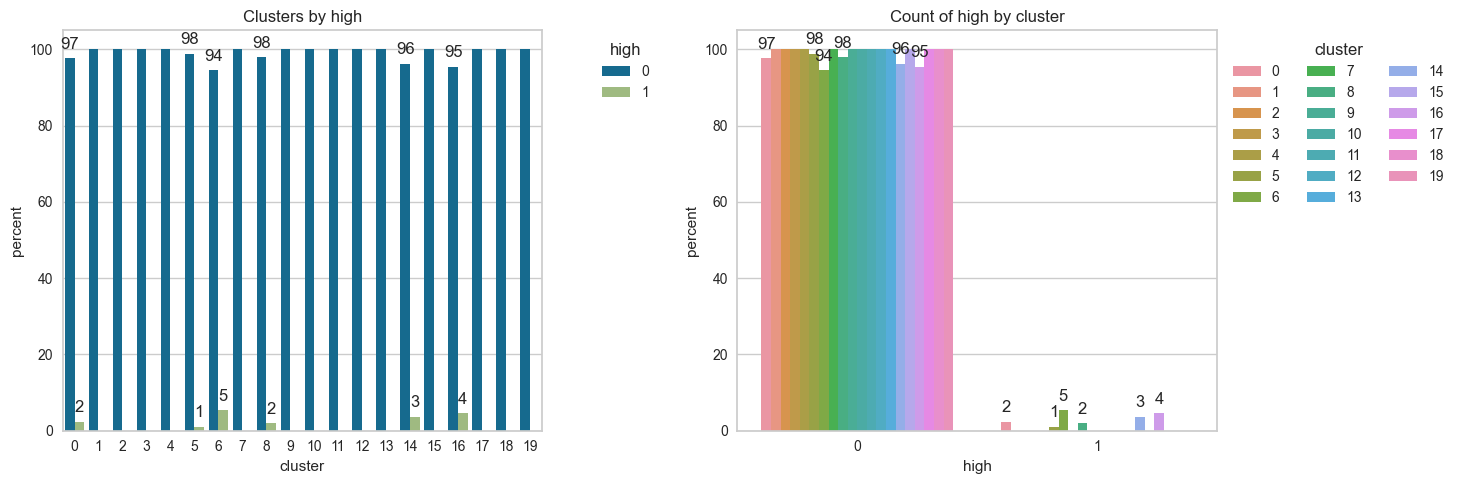

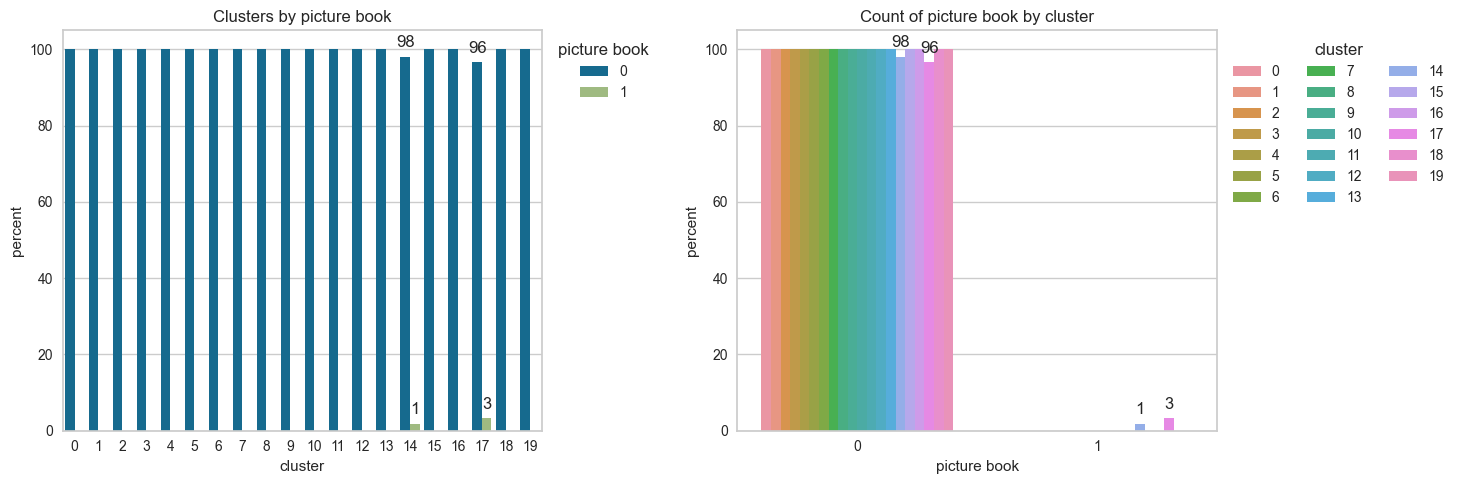

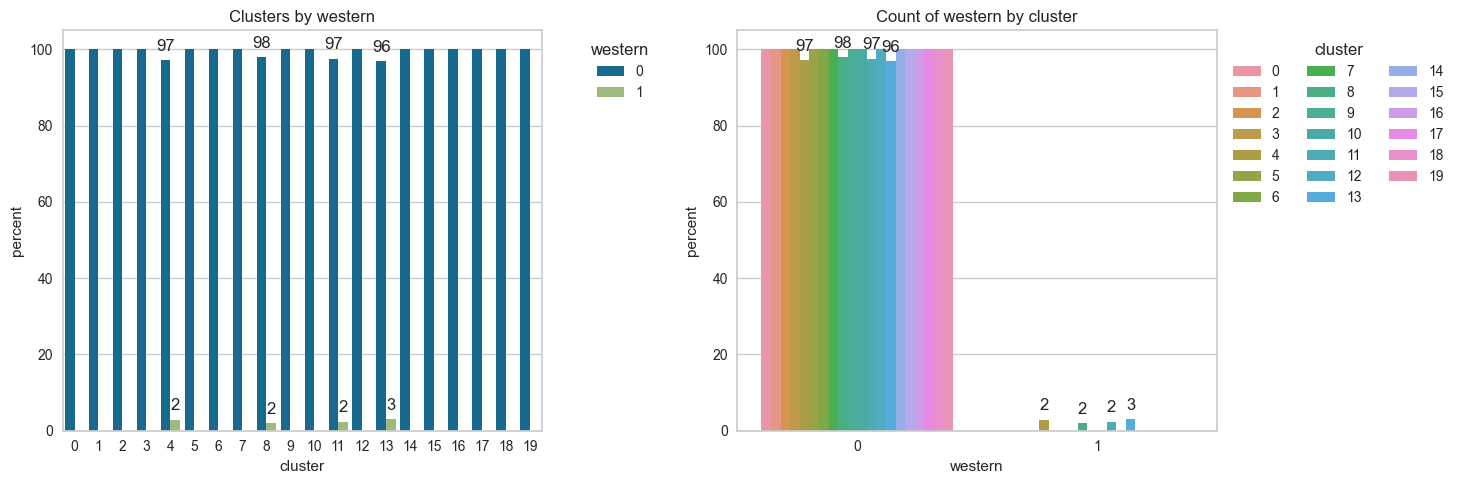

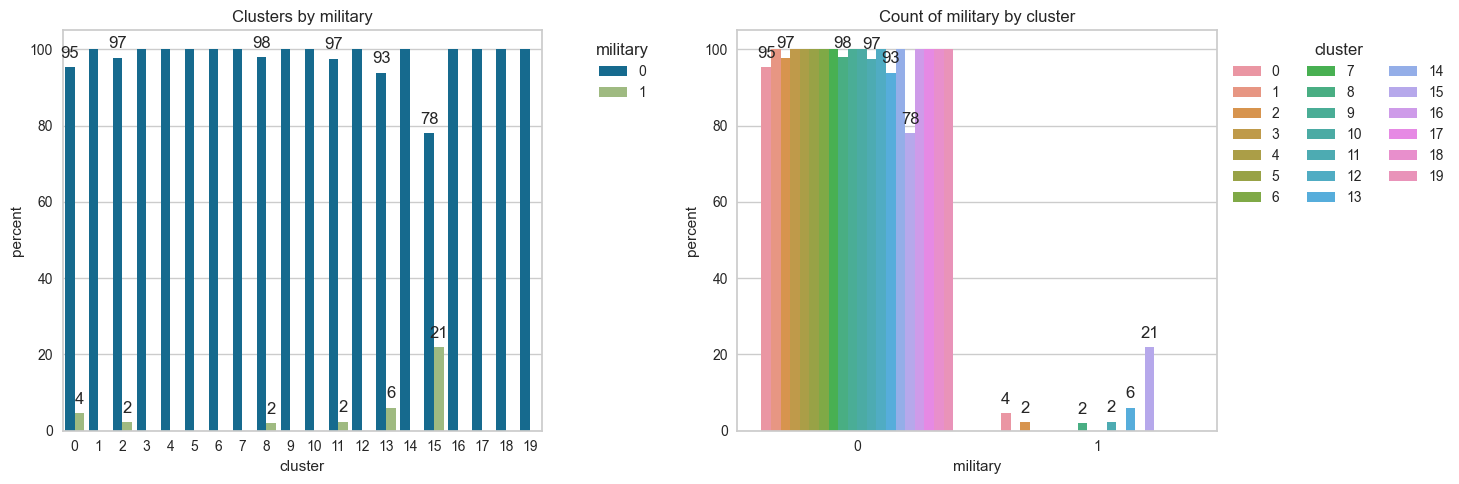

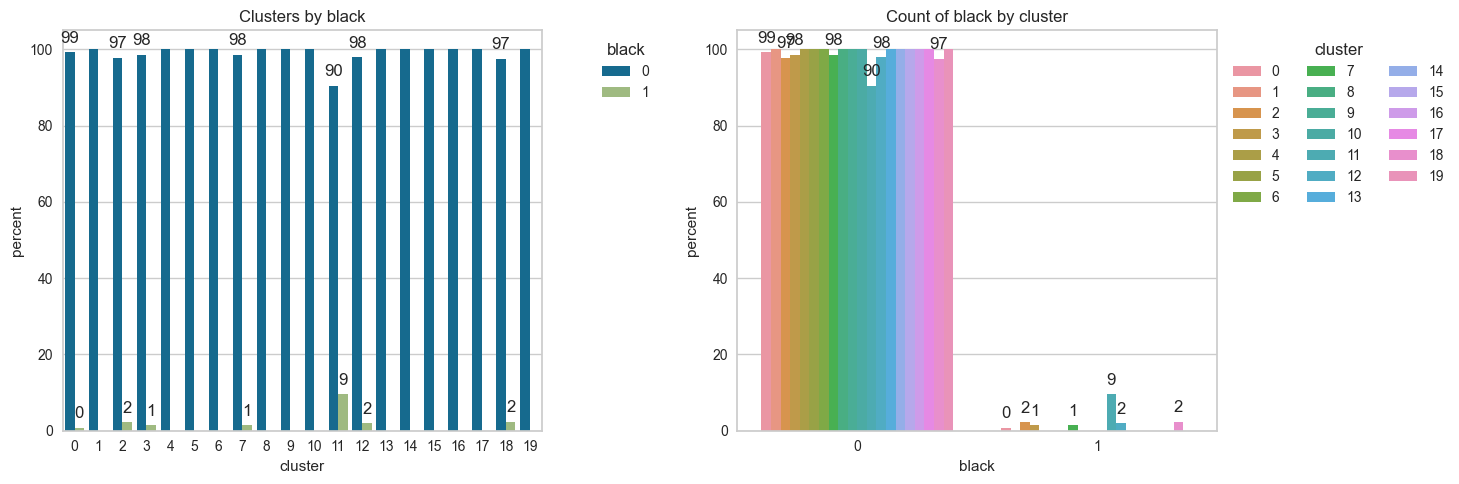

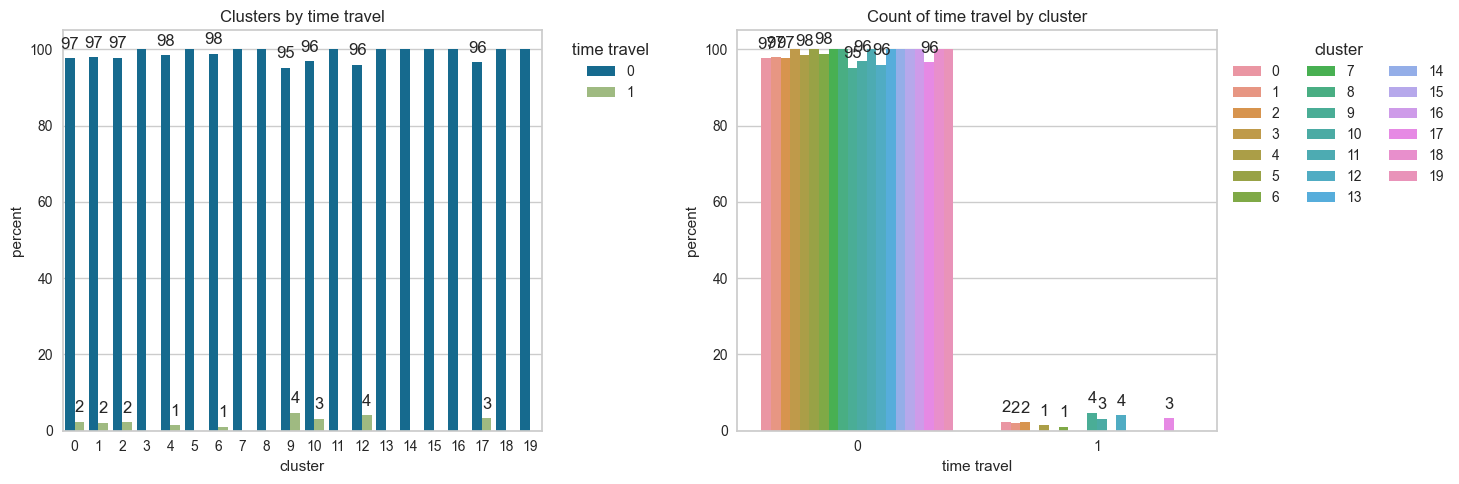

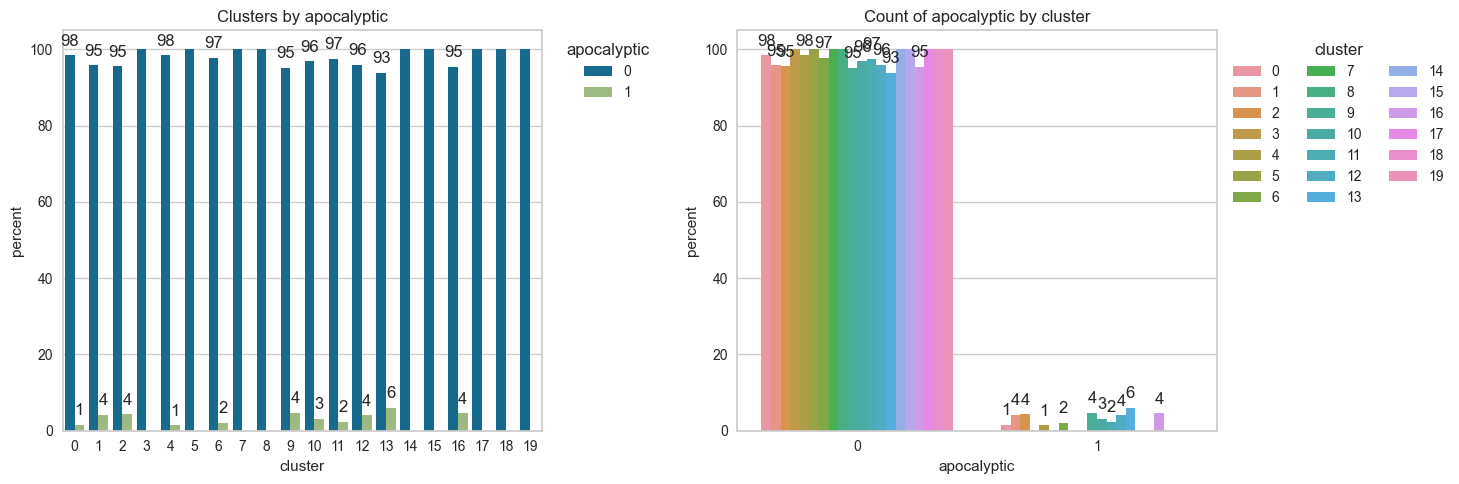

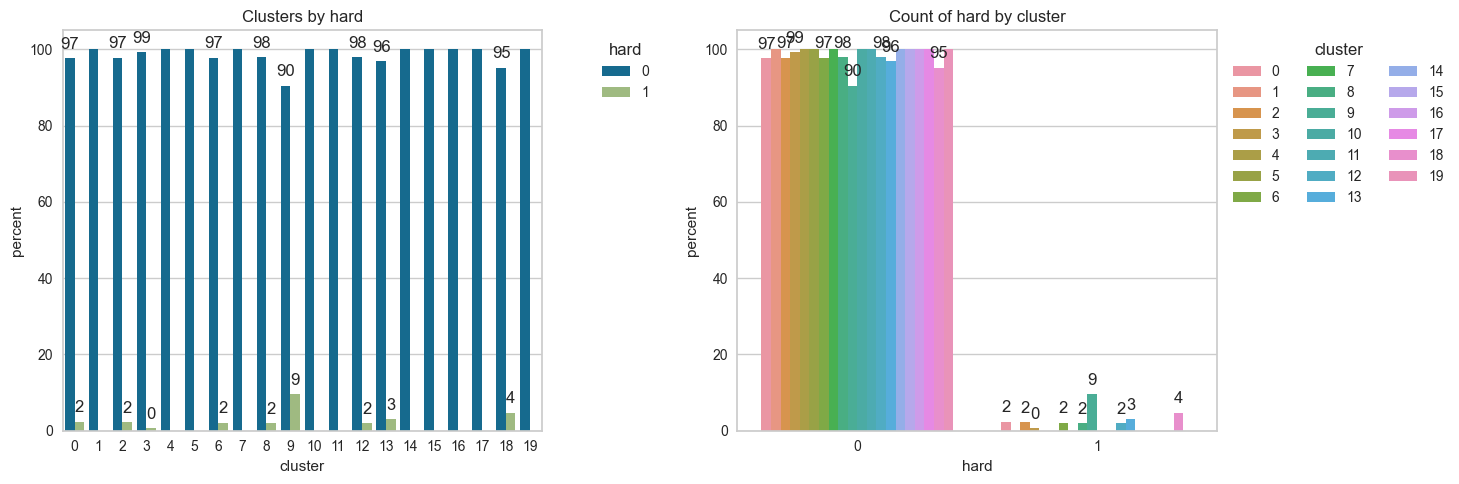

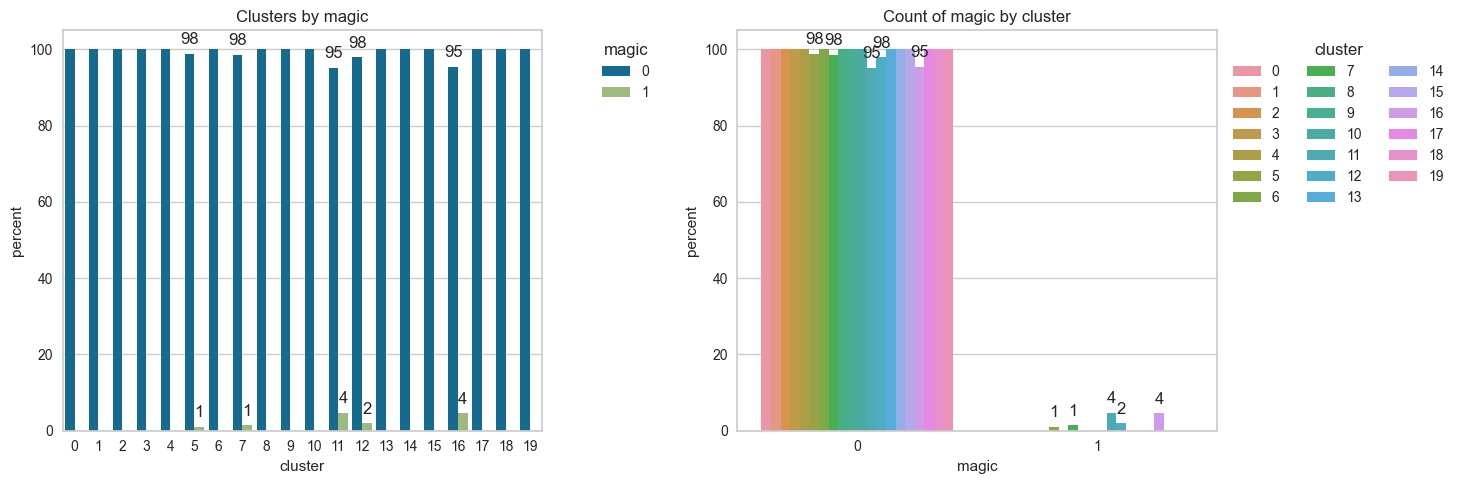

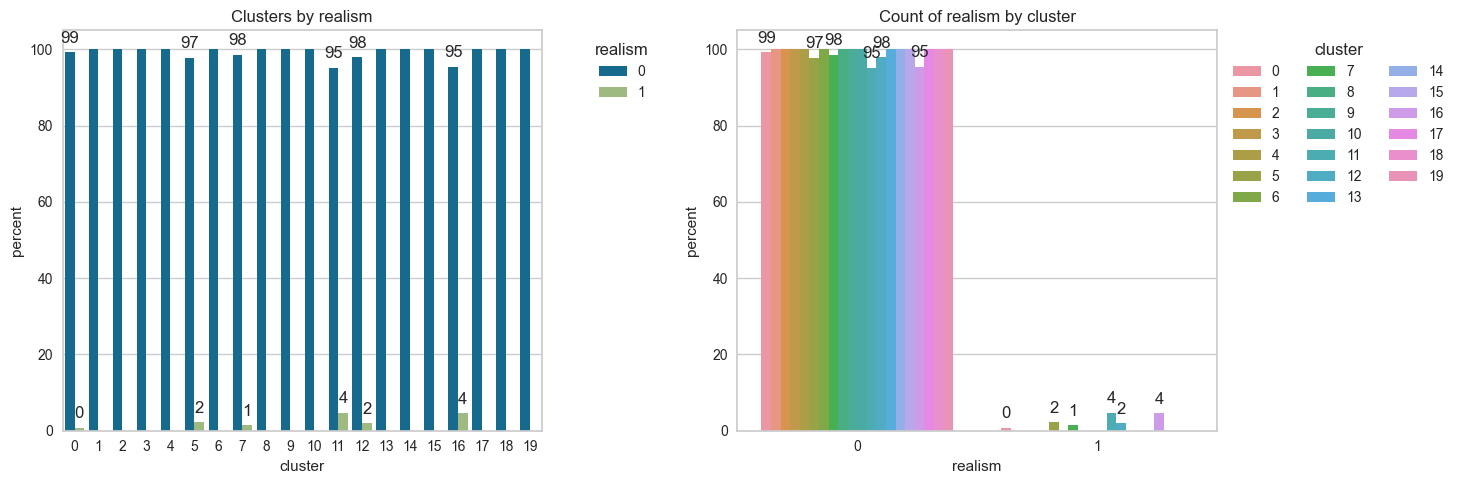

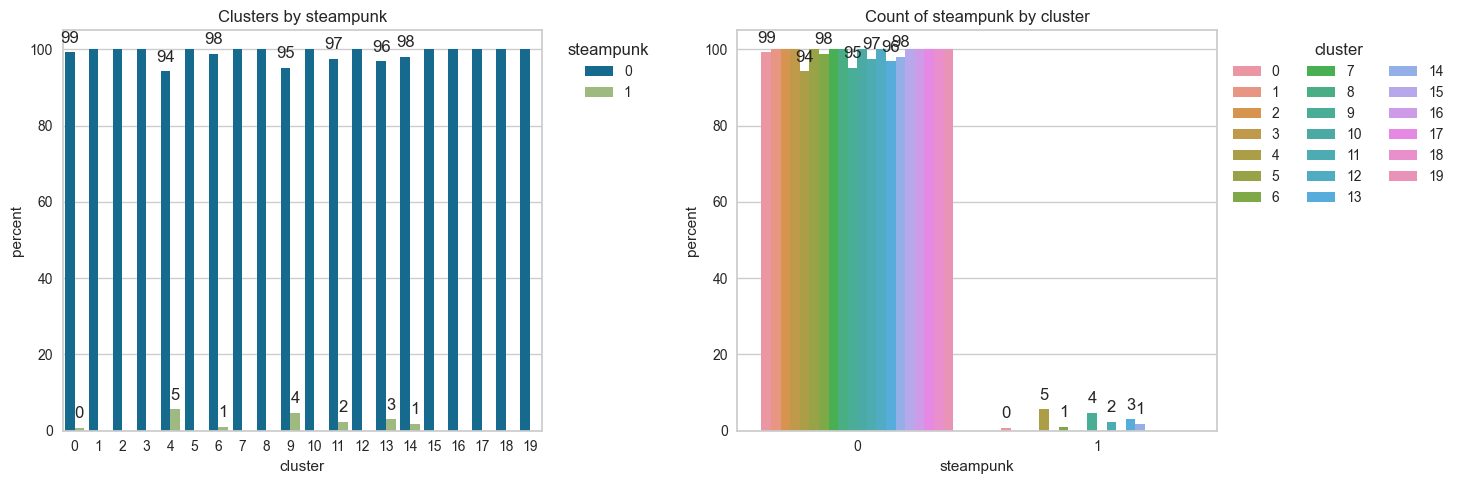

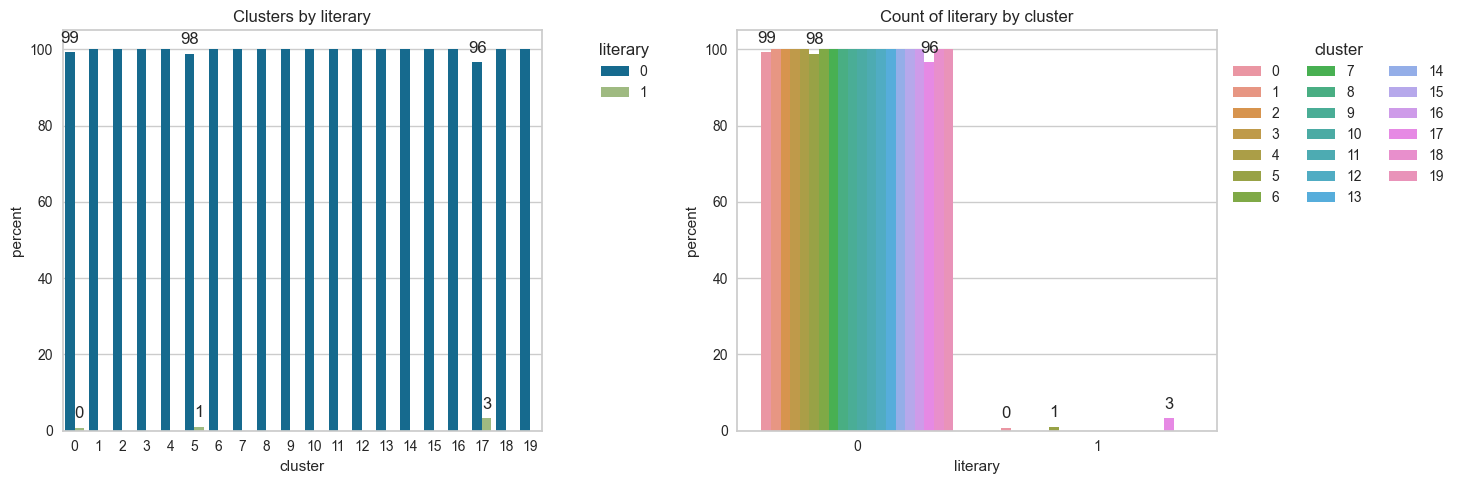

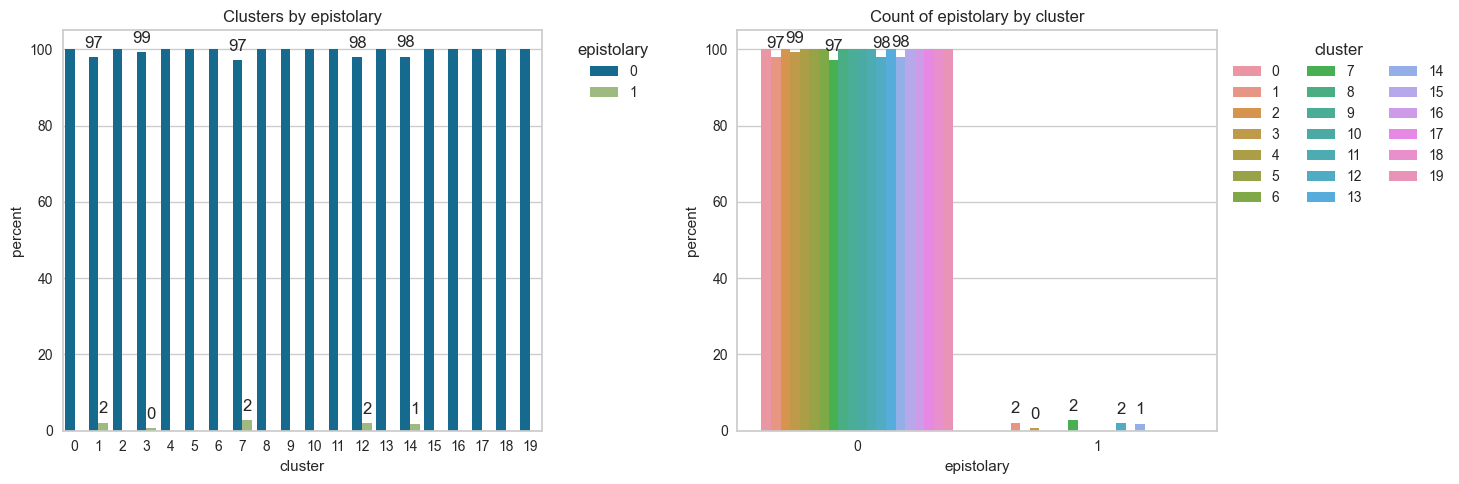

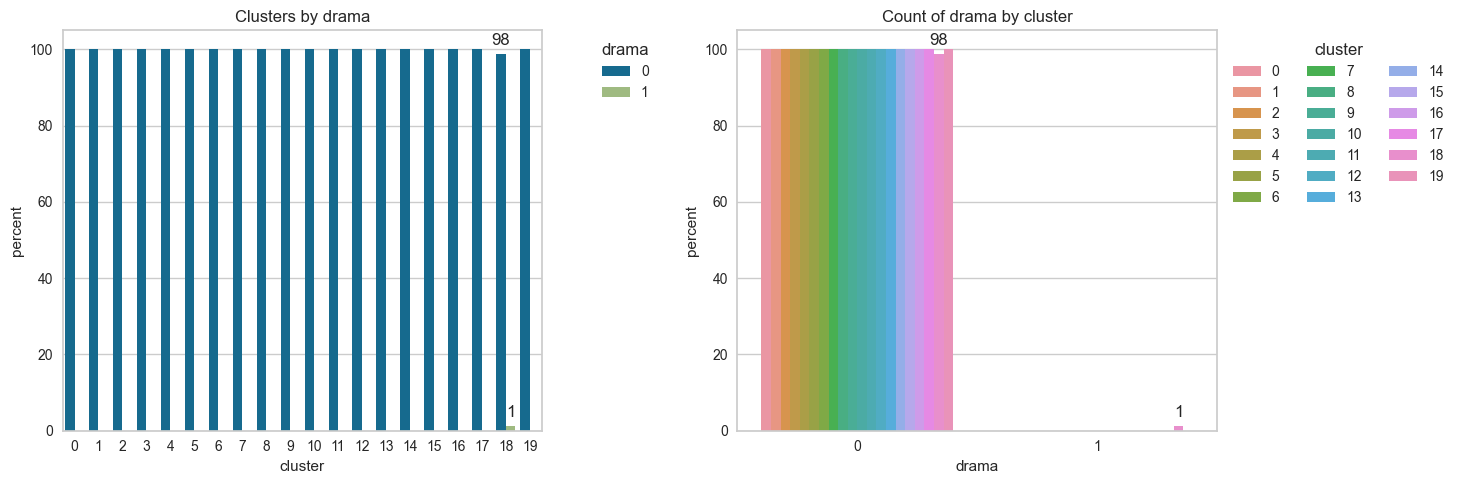

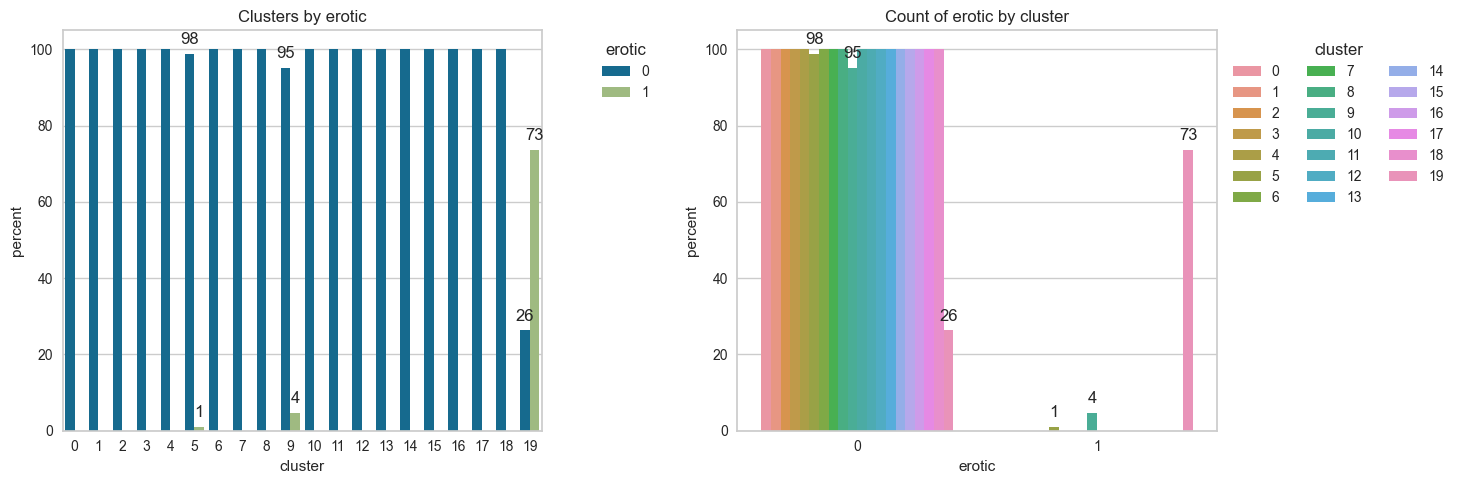

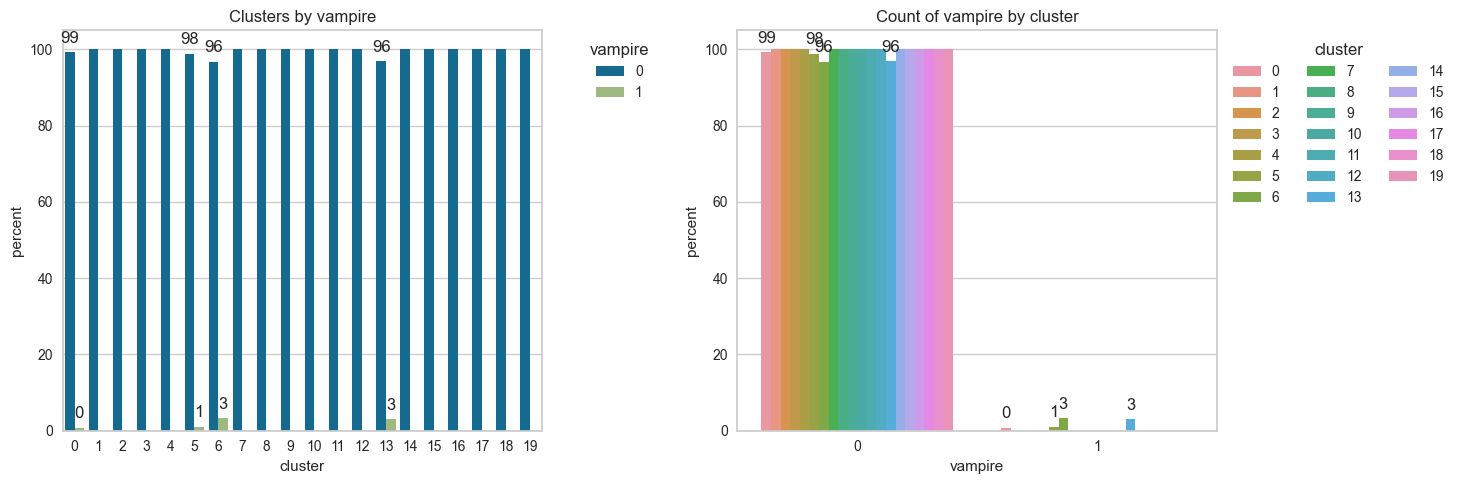

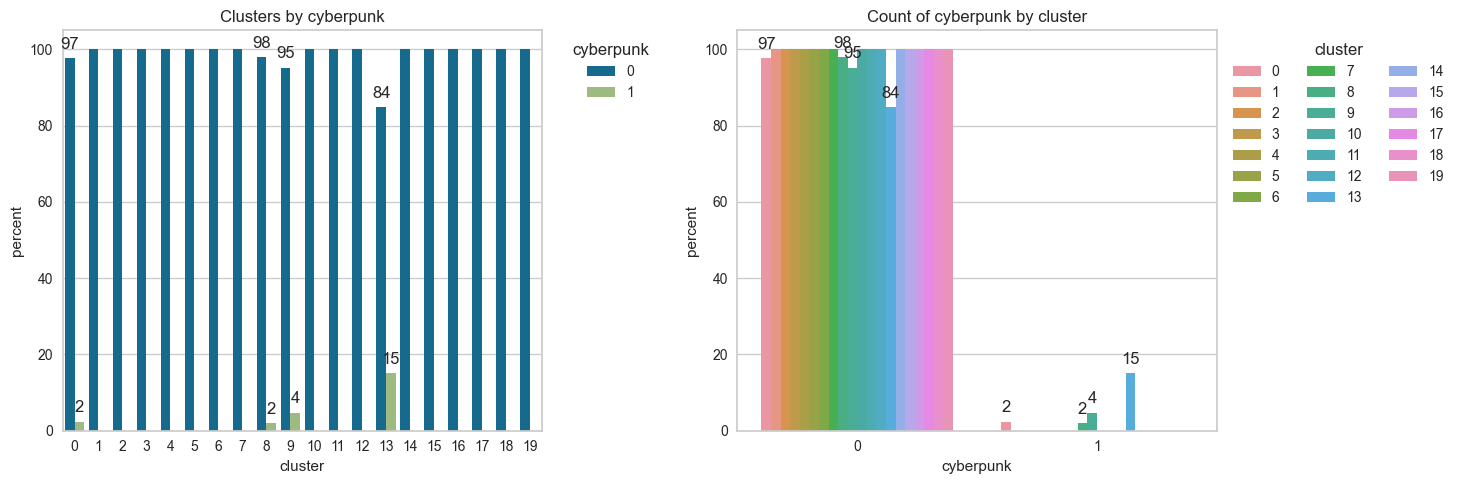

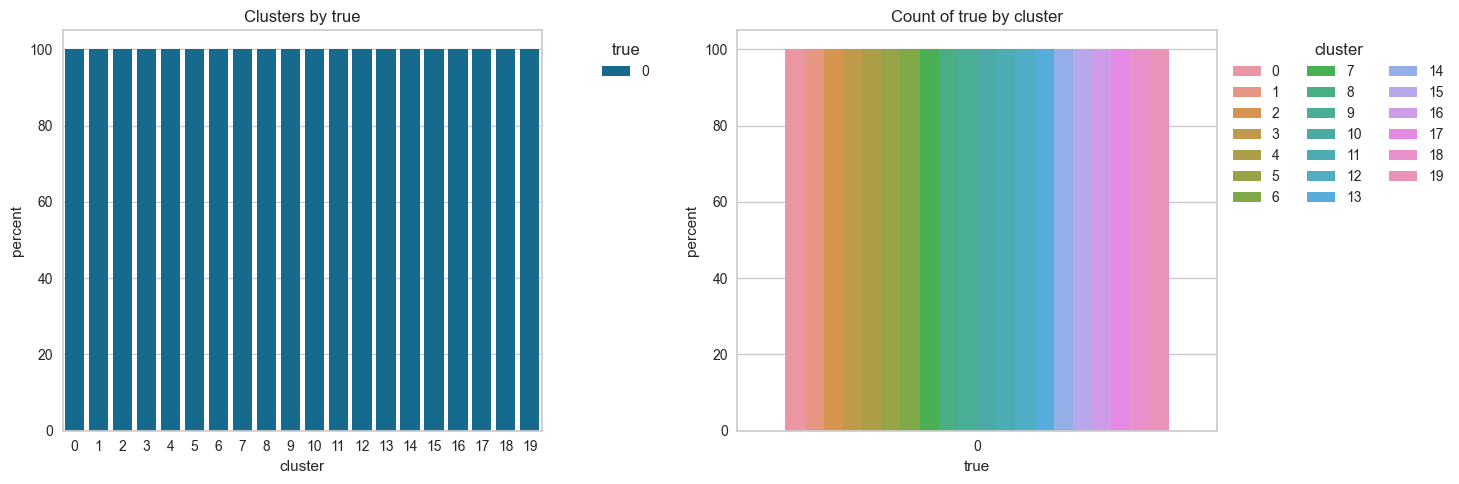

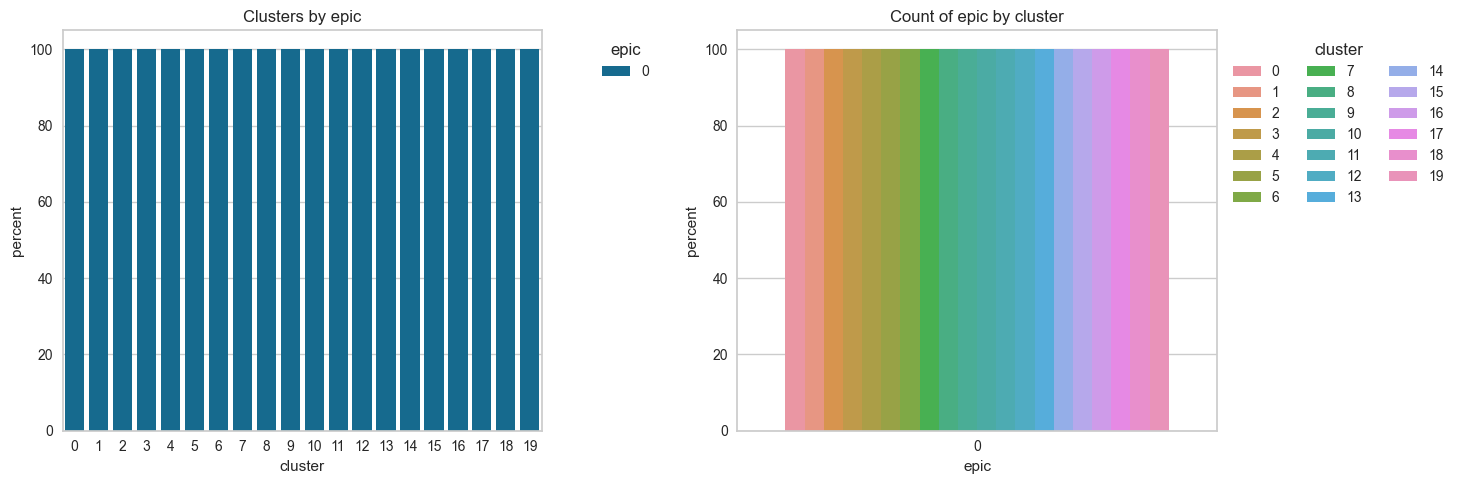

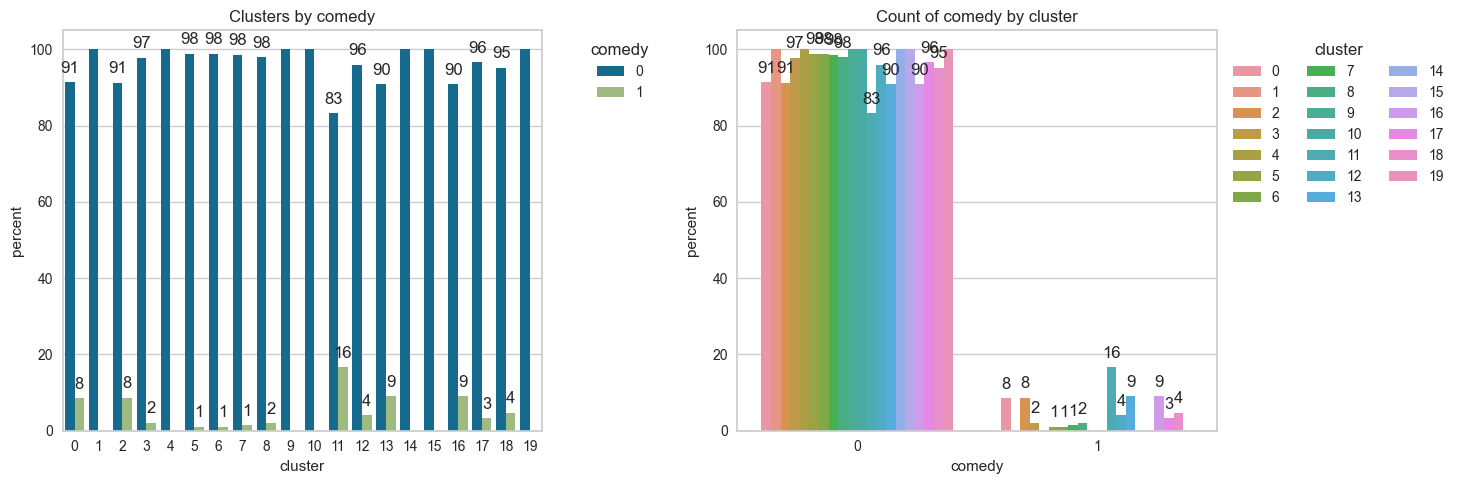

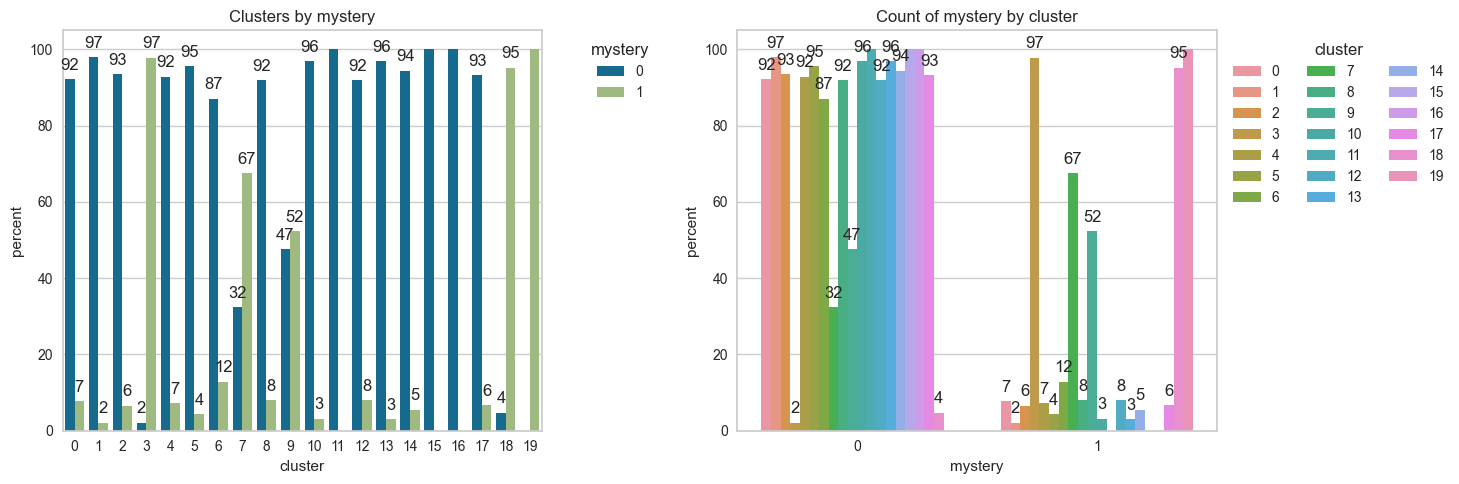

In [74]:
cat_vars = columns
profiling_clustering_cats(cluster_data, cat_vars)